## Assignment-5

### Supervised Machine Learning Algorithms - Linear Regression and SVR

#### **(Stage-0) Goal setting for the project**


- Use Supervised Machine Learning **algorithms** 
  - (Linear Regression, and SVR), and create the **best possible Regression model** to predict Sleep Efficiency.     
  - (DecisionTreeClassifier, and SVC), and create the **best possible Classification model** to predict whether Cholesterol is low or high.

#### **(Stage-1) Collect the Dataset**

Import the needed libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from IPython.display import display, HTML
sns.set_style("whitegrid", {'grid.linestyle': '--'})

To display the dataframe in table format

In [2]:
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [3]:
# Load the datasets
heart_disease_df = pd.read_csv('heart_disease_dataset.csv')
sleep_efficiency_df = pd.read_csv('sleep_Efficiency.csv')

#### **(Stage-2) Prepare the Dataset**

In [4]:
heart_disease_df.shape

(1000, 16)

In [5]:
sleep_efficiency_df.shape

(452, 15)

In [6]:
heart_disease_df.columns = heart_disease_df.columns.str.lower().str.replace(' ','_')
heart_disease_df.columns

Index(['age', 'gender', 'cholesterol', 'blood_pressure', 'heart_rate',
       'smoking', 'alcohol_intake', 'exercise_hours', 'family_history',
       'diabetes', 'obesity', 'stress_level', 'blood_sugar',
       'exercise_induced_angina', 'chest_pain_type', 'heart_disease'],
      dtype='object')

In [7]:
# sleep_efficiency_df.rename(columns = {'Wakeup time':'Wakeup_time', 'Sleep duration':'Sleep_duration',"Sleep efficiency":"Sleep_efficiency",
#                      "REM sleep percentage":"REM_sleep_percentage","Deep sleep percentage":"Deep_sleep_percentage",
#                      "Light sleep percentage":"Light_sleep_percentage","Caffeine consumption":"Caffeine_consumption",
#                      "Alcohol consumption":"alcohol_intake","Smoking status":"smoking",
#                      "Exercise frequency":"exercise_hours"}, 
#           inplace = True)

In [8]:
sleep_efficiency_df.columns = sleep_efficiency_df.columns.str.lower().str.replace(' ','_')
sleep_efficiency_df.columns

Index(['id', 'age', 'gender', 'bedtime', 'wakeup_time', 'sleep_duration',
       'sleep_efficiency', 'rem_sleep_percentage', 'deep_sleep_percentage',
       'light_sleep_percentage', 'awakenings', 'caffeine_consumption',
       'alcohol_consumption', 'smoking_status', 'exercise_frequency'],
      dtype='object')

In [9]:
heart_disease_df['alcohol_intake'].isnull().sum()

340

heart_disease_df['alcohol_intake'].isnull().sum()  ----> 340 <br>
heart_disease_df['alcohol_intake'] = heart_disease_df['alcohol_intake'].replace(np.nan, "Light/None") <br>
heart_disease_df['alcohol_intake'].unique()  ----> array(['Heavy', 'Light/None', 'Moderate'], dtype=object)

In [10]:
heart_disease_df['alcohol_intake'].unique()

array(['Heavy', nan, 'Moderate'], dtype=object)

In [11]:
heart_disease_df['alcohol_intake'] = heart_disease_df['alcohol_intake'].replace(np.nan, "Light/None")
heart_disease_df['alcohol_intake'].unique()

array(['Heavy', 'Light/None', 'Moderate'], dtype=object)

In [12]:
alcohol_cng_test = create_scrollable_table(heart_disease_df.head(50), 'Alcohol change Test', 'Alcohol change Test')
display(HTML(alcohol_cng_test))

In [13]:
# Check for duplicate rows
print(heart_disease_df.duplicated().sum())

0


In [14]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      1000 non-null   int64 
 1   gender                   1000 non-null   object
 2   cholesterol              1000 non-null   int64 
 3   blood_pressure           1000 non-null   int64 
 4   heart_rate               1000 non-null   int64 
 5   smoking                  1000 non-null   object
 6   alcohol_intake           1000 non-null   object
 7   exercise_hours           1000 non-null   int64 
 8   family_history           1000 non-null   object
 9   diabetes                 1000 non-null   object
 10  obesity                  1000 non-null   object
 11  stress_level             1000 non-null   int64 
 12  blood_sugar              1000 non-null   int64 
 13  exercise_induced_angina  1000 non-null   object
 14  chest_pain_type          1000 non-null   

In [15]:
heart_disease_df = heart_disease_df.drop(columns=["chest_pain_type", "exercise_induced_angina", "family_history"])

In [16]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1000 non-null   int64 
 1   gender          1000 non-null   object
 2   cholesterol     1000 non-null   int64 
 3   blood_pressure  1000 non-null   int64 
 4   heart_rate      1000 non-null   int64 
 5   smoking         1000 non-null   object
 6   alcohol_intake  1000 non-null   object
 7   exercise_hours  1000 non-null   int64 
 8   diabetes        1000 non-null   object
 9   obesity         1000 non-null   object
 10  stress_level    1000 non-null   int64 
 11  blood_sugar     1000 non-null   int64 
 12  heart_disease   1000 non-null   int64 
dtypes: int64(8), object(5)
memory usage: 101.7+ KB


In [17]:
alcohol_map = {
    'Light/None' : 0,
    'Moderate': 3, 
    'Heavy' : 5, 
}

smoking_map = {
    'Never' : 0,
    'Former': 0, 
    'Current' : 1, 
}

yes_no_map = {
    'No' : 0,
    'Yes' : 1
}

gender_map = {
    'Female' : 0,
    'Male' : 1
}

heart_disease_df['smoking'] = heart_disease_df['smoking'].map(smoking_map)

heart_disease_df['alcohol_intake'] = heart_disease_df['alcohol_intake'].map(alcohol_map)

heart_disease_df['diabetes'] = heart_disease_df['diabetes'].map(yes_no_map)

heart_disease_df['obesity'] = heart_disease_df['obesity'].map(yes_no_map)

heart_disease_df['gender'] = heart_disease_df['gender'].map(gender_map)

heart_disease_df.head()

age  gender  cholesterol  blood_pressure  heart_rate  smoking  \
0   75       0          228             119          66        1   
1   48       1          204             165          62        1   
2   53       1          234              91          67        0   
3   69       0          192              90          72        1   
4   62       0          172             163          93        0   

   alcohol_intake  exercise_hours  diabetes  obesity  stress_level  \
0               5               1         0        1             8   
1               0               5         0        0             9   
2               5               3         0        1             5   
3               0               4         1        0             7   
4               0               6         1        0             2   

   blood_sugar  heart_disease  
0          119              1  
1           70              0  
2          196              1  
3          107              0  
4          183              0

#### **(Stage-3) Feature Engineering**

In [18]:
heart_disease_df_test = create_scrollable_table(heart_disease_df.head(50), 'heart_disease_df Test', 'heart_disease_df Test')
display(HTML(heart_disease_df_test))

##### Using Heatmap chart to understand the **correlation between various features** in the dataset

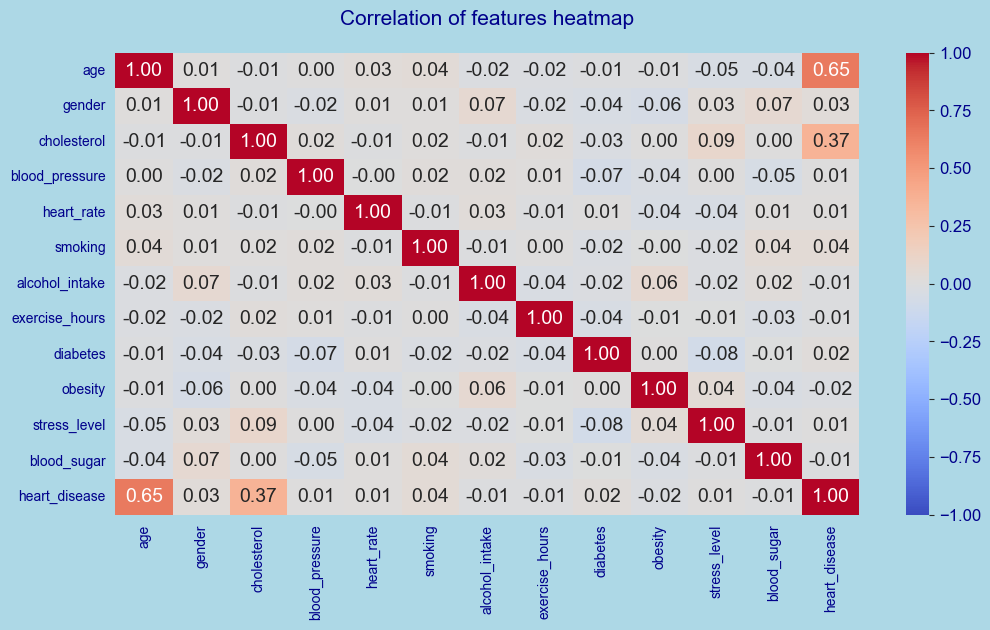

In [19]:
plt.figure(figsize=(12, 6))
# heatmap = sns.heatmap(heart_disease_df.corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap='flare',annot_kws={"fontsize":14}, fmt='.2f')
heatmap = sns.heatmap(heart_disease_df.corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap='coolwarm',annot_kws={"fontsize":14}, fmt='.2f')
sns.set(font_scale=2)
plt.title('Correlation of features heatmap',fontsize=15, color='darkblue', pad=20)
plt.xticks(color='darkblue', fontsize=10)
plt.yticks(color='darkblue', fontsize=10)

colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelcolor='darkblue', labelsize=12)

plt.gcf().patch.set_facecolor('lightblue')
plt.show()

In [20]:
heart_disease_df.columns

Index(['age', 'gender', 'cholesterol', 'blood_pressure', 'heart_rate',
       'smoking', 'alcohol_intake', 'exercise_hours', 'diabetes', 'obesity',
       'stress_level', 'blood_sugar', 'heart_disease'],
      dtype='object')

In [21]:
heart_disease_df = heart_disease_df.drop(columns=["stress_level"])
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             1000 non-null   int64
 1   gender          1000 non-null   int64
 2   cholesterol     1000 non-null   int64
 3   blood_pressure  1000 non-null   int64
 4   heart_rate      1000 non-null   int64
 5   smoking         1000 non-null   int64
 6   alcohol_intake  1000 non-null   int64
 7   exercise_hours  1000 non-null   int64
 8   diabetes        1000 non-null   int64
 9   obesity         1000 non-null   int64
 10  blood_sugar     1000 non-null   int64
 11  heart_disease   1000 non-null   int64
dtypes: int64(12)
memory usage: 93.9 KB


Let's work on sleep_efficiency_df 

In [22]:
sleep_efficiency_df_test = create_scrollable_table(sleep_efficiency_df.head(50), 'sleep_efficiency_df Test', 'sleep_efficiency_df Test')
display(HTML(sleep_efficiency_df_test))

Remove less important columns <br>
heart_disease_df.drop(columns=["chest_pain_type", "exercise_induced_angina", "family_history","stress_level"])<br>
sleep_efficiency_df.drop(columns=["bedtime", "wakeup_time", "id", "rem_sleep_percentage", "caffeine_consumption"])

In [23]:
sleep_efficiency_df = sleep_efficiency_df.drop(columns=["bedtime", "wakeup_time", "id", "rem_sleep_percentage", "caffeine_consumption"])
sleep_efficiency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     452 non-null    int64  
 1   gender                  452 non-null    object 
 2   sleep_duration          452 non-null    float64
 3   sleep_efficiency        452 non-null    float64
 4   deep_sleep_percentage   452 non-null    int64  
 5   light_sleep_percentage  452 non-null    int64  
 6   awakenings              432 non-null    float64
 7   alcohol_consumption     438 non-null    float64
 8   smoking_status          452 non-null    object 
 9   exercise_frequency      446 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 35.4+ KB


In [24]:
sleep_efficiency_df.head(5)

age  gender  sleep_duration  sleep_efficiency  deep_sleep_percentage  \
0   65  Female             6.0              0.88                     70   
1   69    Male             7.0              0.66                     28   
2   40  Female             8.0              0.89                     70   
3   40  Female             6.0              0.51                     25   
4   57    Male             8.0              0.76                     55   

   light_sleep_percentage  awakenings  alcohol_consumption smoking_status  \
0                      12         0.0                  0.0            Yes   
1                      53         3.0                  3.0            Yes   
2                      10         1.0                  0.0             No   
3                      52         3.0                  5.0            Yes   
4                      18         3.0                  3.0             No   

   exercise_frequency  
0                 3.0  
1                 3.0  
2                 3.0  
3                 1.0  
4                 3.0

In [25]:
# sleep_efficiency_df = sleep_efficiency_df.drop(columns=["sleep_duration"])

In [26]:
heart_disease_df.head(5)

age  gender  cholesterol  blood_pressure  heart_rate  smoking  \
0   75       0          228             119          66        1   
1   48       1          204             165          62        1   
2   53       1          234              91          67        0   
3   69       0          192              90          72        1   
4   62       0          172             163          93        0   

   alcohol_intake  exercise_hours  diabetes  obesity  blood_sugar  \
0               5               1         0        1          119   
1               0               5         0        0           70   
2               5               3         0        1          196   
3               0               4         1        0          107   
4               0               6         1        0          183   

   heart_disease  
0              1  
1              0  
2              1  
3              0  
4              0

In [27]:
heart_disease_df = heart_disease_df.drop(columns=["diabetes","obesity","heart_disease"])

In [28]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             1000 non-null   int64
 1   gender          1000 non-null   int64
 2   cholesterol     1000 non-null   int64
 3   blood_pressure  1000 non-null   int64
 4   heart_rate      1000 non-null   int64
 5   smoking         1000 non-null   int64
 6   alcohol_intake  1000 non-null   int64
 7   exercise_hours  1000 non-null   int64
 8   blood_sugar     1000 non-null   int64
dtypes: int64(9)
memory usage: 70.4 KB


In [29]:
sleep_efficiency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     452 non-null    int64  
 1   gender                  452 non-null    object 
 2   sleep_duration          452 non-null    float64
 3   sleep_efficiency        452 non-null    float64
 4   deep_sleep_percentage   452 non-null    int64  
 5   light_sleep_percentage  452 non-null    int64  
 6   awakenings              432 non-null    float64
 7   alcohol_consumption     438 non-null    float64
 8   smoking_status          452 non-null    object 
 9   exercise_frequency      446 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 35.4+ KB


In [30]:
sleep_efficiency_df.rename(columns = {
                     "alcohol_consumption":"alcohol_intake","smoking_status":"smoking",
                     "exercise_frequency":"exercise_hours"}, 
          inplace = True)

In [31]:
# Fill missing values in 'alcohol_intake' and 'exercise_hours' with 0
# sleep_efficiency_df['alcohol_intake'].fillna(0, inplace=True)
# sleep_efficiency_df['exercise_hours'].fillna(0, inplace=True)

sleep_efficiency_df['alcohol_intake'] = sleep_efficiency_df['alcohol_intake'].fillna(0)
sleep_efficiency_df['exercise_hours'] = sleep_efficiency_df['exercise_hours'].fillna(0)


In [32]:
# Ensure Alcohol_consumption and Exercise_frequency are int in sleep_efficiency_df
sleep_efficiency_df['alcohol_intake'] = sleep_efficiency_df['alcohol_intake'].astype(int)
sleep_efficiency_df['exercise_hours'] = sleep_efficiency_df['exercise_hours'].astype(int)

In [33]:
sleep_efficiency_df_test = create_scrollable_table(sleep_efficiency_df.head(5), 'sleep_efficiency_df Test', 'sleep_efficiency_df Test')
display(HTML(sleep_efficiency_df_test))

In [34]:

yes_no_map = {
    'No' : 0,
    'Yes' : 1
}

gender_map = {
    'Female' : 0,
    'Male' : 1
}

sleep_efficiency_df['smoking'] = sleep_efficiency_df['smoking'].map(yes_no_map)

sleep_efficiency_df['gender'] = sleep_efficiency_df['gender'].map(gender_map)

sleep_efficiency_df.head()

age  gender  sleep_duration  sleep_efficiency  deep_sleep_percentage  \
0   65       0             6.0              0.88                     70   
1   69       1             7.0              0.66                     28   
2   40       0             8.0              0.89                     70   
3   40       0             6.0              0.51                     25   
4   57       1             8.0              0.76                     55   

   light_sleep_percentage  awakenings  alcohol_intake  smoking  exercise_hours  
0                      12         0.0               0        1               3  
1                      53         3.0               3        1               3  
2                      10         1.0               0        0               3  
3                      52         3.0               5        1               1  
4                      18         3.0               3        0               3

In [35]:
sleep_efficiency_df.columns

Index(['age', 'gender', 'sleep_duration', 'sleep_efficiency',
       'deep_sleep_percentage', 'light_sleep_percentage', 'awakenings',
       'alcohol_intake', 'smoking', 'exercise_hours'],
      dtype='object')

In [36]:
heart_disease_df.columns

Index(['age', 'gender', 'cholesterol', 'blood_pressure', 'heart_rate',
       'smoking', 'alcohol_intake', 'exercise_hours', 'blood_sugar'],
      dtype='object')

In [37]:
# List of common columns
common_columns = ['age', 'gender', 'smoking', 'alcohol_intake']

# Group heart disease data by common columns and calculate probability of cholesterol, blood pressure, 
# heart rate, blood sugar and append these with sleep_efficiency_df
grouped_heart_disease = heart_disease_df.groupby(common_columns).agg({
    'cholesterol':'mean','blood_pressure':'mean','heart_rate':'mean','blood_sugar':'mean'}).reset_index()

grouped_heart_disease_test = create_scrollable_table(grouped_heart_disease, 'grouped_heart_disease Test', 'grouped_heart_disease Test')
display(HTML(grouped_heart_disease_test))

In [38]:
sleep_efficiency_df['awakenings'] = sleep_efficiency_df['awakenings'].fillna(0)
sleep_efficiency_df['awakenings'] = sleep_efficiency_df['awakenings'].astype('int64')
sleep_efficiency_df['alcohol_intake'] = sleep_efficiency_df['alcohol_intake'].astype('int64')
sleep_efficiency_df['exercise_hours'] = sleep_efficiency_df['exercise_hours'].astype('int64')

In [39]:
grouped_heart_disease['cholesterol'] = grouped_heart_disease['cholesterol'].astype('int64')
grouped_heart_disease['blood_pressure'] = grouped_heart_disease['blood_pressure'].astype('int64')
grouped_heart_disease['heart_rate'] = grouped_heart_disease['heart_rate'].astype('int64')
grouped_heart_disease['blood_sugar'] = grouped_heart_disease['blood_sugar'].astype('int64')

grouped_heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             494 non-null    int64
 1   gender          494 non-null    int64
 2   smoking         494 non-null    int64
 3   alcohol_intake  494 non-null    int64
 4   cholesterol     494 non-null    int64
 5   blood_pressure  494 non-null    int64
 6   heart_rate      494 non-null    int64
 7   blood_sugar     494 non-null    int64
dtypes: int64(8)
memory usage: 31.0 KB


In [40]:
heart_disease_df.head(5)

age  gender  cholesterol  blood_pressure  heart_rate  smoking  \
0   75       0          228             119          66        1   
1   48       1          204             165          62        1   
2   53       1          234              91          67        0   
3   69       0          192              90          72        1   
4   62       0          172             163          93        0   

   alcohol_intake  exercise_hours  blood_sugar  
0               5               1          119  
1               0               5           70  
2               5               3          196  
3               0               4          107  
4               0               6          183

In [41]:
# Merge sleep efficiency data with grouped heart disease data
sleep_efficiency_with_heart_disease = pd.merge(sleep_efficiency_df, grouped_heart_disease, on=common_columns, how='left')

sleep_efficiency_with_heart_disease_test = create_scrollable_table(sleep_efficiency_with_heart_disease, 'sleep_efficiency_with_heart_disease Test', 'sleep_efficiency_with_heart_disease Test')
display(HTML(sleep_efficiency_with_heart_disease_test))

In [42]:
# Calculate overall probabilities

# overall_cholesterol_prob = heart_disease_df['cholesterol'].mean()
# overall_blood_pressure_prob = heart_disease_df['blood_pressure'].mean()
# overall_heart_rate_prob = heart_disease_df['heart_rate'].mean()
# overall_blood_sugar_prob = heart_disease_df['blood_sugar'].mean()

# sleep_efficiency_with_heart_disease['cholesterol'].fillna(overall_cholesterol_prob, inplace=True)
# sleep_efficiency_with_heart_disease['blood_pressure'].fillna(overall_blood_pressure_prob, inplace=True)
# sleep_efficiency_with_heart_disease['heart_rate'].fillna(overall_heart_rate_prob, inplace=True)
# sleep_efficiency_with_heart_disease['blood_sugar'].fillna(overall_blood_sugar_prob, inplace=True)

In [43]:
sleep_efficiency_with_heart_disease.isnull().sum()

age                         0
gender                      0
sleep_duration              0
sleep_efficiency            0
deep_sleep_percentage       0
light_sleep_percentage      0
awakenings                  0
alcohol_intake              0
smoking                     0
exercise_hours              0
cholesterol               219
blood_pressure            219
heart_rate                219
blood_sugar               219
dtype: int64

In [44]:
# Save the updated sleep efficiency dataset
sleep_efficiency_with_heart_disease.to_csv('sleep_efficiency_with_heart_disease.csv', index=False)
sleep_efficiency_with_heart_disease.columns

Index(['age', 'gender', 'sleep_duration', 'sleep_efficiency',
       'deep_sleep_percentage', 'light_sleep_percentage', 'awakenings',
       'alcohol_intake', 'smoking', 'exercise_hours', 'cholesterol',
       'blood_pressure', 'heart_rate', 'blood_sugar'],
      dtype='object')

In [45]:
len(sleep_efficiency_with_heart_disease)

452

Let's work on heart_disease df

In [46]:
heart_disease_df.columns

Index(['age', 'gender', 'cholesterol', 'blood_pressure', 'heart_rate',
       'smoking', 'alcohol_intake', 'exercise_hours', 'blood_sugar'],
      dtype='object')

In [47]:
heart_disease_df.isnull().sum()

age               0
gender            0
cholesterol       0
blood_pressure    0
heart_rate        0
smoking           0
alcohol_intake    0
exercise_hours    0
blood_sugar       0
dtype: int64

In [48]:
# Identify common columns (case-insensitive)
heart_cols = set(col.lower() for col in heart_disease_df.columns)
sleep_cols = set(col.lower() for col in sleep_efficiency_with_heart_disease.columns)
common_columns = list(heart_cols.intersection(sleep_cols))

print("\nCommon Columns:")
print(common_columns)
print("\nsleep_cols", sleep_cols)
print("\nheart_cols", heart_cols)


Common Columns:
['exercise_hours', 'cholesterol', 'gender', 'smoking', 'age', 'blood_sugar', 'blood_pressure', 'alcohol_intake', 'heart_rate']

sleep_cols {'sleep_duration', 'exercise_hours', 'gender', 'cholesterol', 'age', 'smoking', 'light_sleep_percentage', 'deep_sleep_percentage', 'blood_sugar', 'awakenings', 'blood_pressure', 'alcohol_intake', 'heart_rate', 'sleep_efficiency'}

heart_cols {'cholesterol', 'gender', 'exercise_hours', 'age', 'smoking', 'blood_sugar', 'blood_pressure', 'alcohol_intake', 'heart_rate'}


In [49]:
# List of common columns
common_columns = ['age', 'gender', 'smoking', 'alcohol_intake']

# Group sleep data by common columns and calculate probability of sleep_duration, 
# deep_sleep_percentage, light_sleep_percentage, sleep_efficiency, awakenings
# and append these with heart_disease_df
grouped_sleep_data = sleep_efficiency_with_heart_disease.groupby(common_columns).agg({
    'deep_sleep_percentage': 'mean','light_sleep_percentage': 'mean',
'sleep_efficiency': 'mean','awakenings':'mean','sleep_duration':'mean' }).reset_index()

grouped_sleep_data_test = create_scrollable_table(grouped_sleep_data, 'grouped_sleep_data Test', 'grouped_sleep_data Test')
display(HTML(grouped_sleep_data_test))

In [50]:
# Merge heart_disease data with grouped_sleep_data
heart_disease_df_with_sleep_data = pd.merge(heart_disease_df, grouped_sleep_data, on=common_columns, how='left')

heart_disease_df_with_sleep_data_test = create_scrollable_table(heart_disease_df_with_sleep_data, 'heart_disease_df_with_sleep_data Test', 'heart_disease_df_with_sleep_data Test')
display(HTML(heart_disease_df_with_sleep_data_test))

In [51]:
len(heart_disease_df_with_sleep_data)

1000

In [52]:
# # Calculate overall probabilities from sleep_efficiency_updated

# overall_light_sleep_prob = sleep_efficiency_with_heart_disease['light_sleep_percentage'].mean()
# overall_deep_sleep_prob = sleep_efficiency_with_heart_disease['deep_sleep_percentage'].mean()
# overall_sleep_efficiency_prob = sleep_efficiency_with_heart_disease['sleep_efficiency'].mean()
# overall_sleep_duration_prob = sleep_efficiency_with_heart_disease['sleep_duration'].mean()
# overall_awakenings_prob = sleep_efficiency_with_heart_disease['awakenings'].mean()

# # Fill any remaining NaN values with overall probabilities of sleep_efficiency_updated in heart_disease_df_with_sleep_data
# heart_disease_df_with_sleep_data['light_sleep_percentage'].fillna(overall_light_sleep_prob, inplace=True)
# heart_disease_df_with_sleep_data['deep_sleep_percentage'].fillna(overall_deep_sleep_prob, inplace=True)
# heart_disease_df_with_sleep_data['sleep_efficiency'].fillna(overall_sleep_efficiency_prob, inplace=True)
# heart_disease_df_with_sleep_data['sleep_duration'].fillna(overall_sleep_duration_prob, inplace=True)
# heart_disease_df_with_sleep_data['awakenings'].fillna(overall_awakenings_prob, inplace=True)

In [53]:
heart_disease_df_with_sleep_data.head()

age  gender  cholesterol  blood_pressure  heart_rate  smoking  \
0   75       0          228             119          66        1   
1   48       1          204             165          62        1   
2   53       1          234              91          67        0   
3   69       0          192              90          72        1   
4   62       0          172             163          93        0   

   alcohol_intake  exercise_hours  blood_sugar  deep_sleep_percentage  \
0               5               1          119                    NaN   
1               0               5           70                  64.25   
2               5               3          196                  20.00   
3               0               4          107                    NaN   
4               0               6          183                    NaN   

   light_sleep_percentage  sleep_efficiency  awakenings  sleep_duration  
0                     NaN               NaN         NaN             NaN  
1                    14.0            0.9075        1.25            7.25  
2                    55.0            0.6300        3.00            7.00  
3                     NaN               NaN         NaN             NaN  
4                     NaN               NaN         NaN             NaN

In [54]:
# Desired column order
new_order = ['age', 'gender', 'sleep_duration', 'sleep_efficiency', 'deep_sleep_percentage',
       'light_sleep_percentage', 'awakenings', 'alcohol_intake', 'smoking',
       'exercise_hours', 'cholesterol', 'blood_pressure', 'heart_rate',
       'blood_sugar']

heart_disease_df_with_sleep_data = heart_disease_df_with_sleep_data[new_order]

heart_disease_df_with_sleep_data.columns

Index(['age', 'gender', 'sleep_duration', 'sleep_efficiency',
       'deep_sleep_percentage', 'light_sleep_percentage', 'awakenings',
       'alcohol_intake', 'smoking', 'exercise_hours', 'cholesterol',
       'blood_pressure', 'heart_rate', 'blood_sugar'],
      dtype='object')

In [55]:
# Save the updated heart disease dataset
heart_disease_df_with_sleep_data.to_csv('heart_disease_df_with_sleep_data.csv', index=False)
heart_disease_df_with_sleep_data.columns

Index(['age', 'gender', 'sleep_duration', 'sleep_efficiency',
       'deep_sleep_percentage', 'light_sleep_percentage', 'awakenings',
       'alcohol_intake', 'smoking', 'exercise_hours', 'cholesterol',
       'blood_pressure', 'heart_rate', 'blood_sugar'],
      dtype='object')

In [56]:
sleep_efficiency_with_heart_disease.columns

Index(['age', 'gender', 'sleep_duration', 'sleep_efficiency',
       'deep_sleep_percentage', 'light_sleep_percentage', 'awakenings',
       'alcohol_intake', 'smoking', 'exercise_hours', 'cholesterol',
       'blood_pressure', 'heart_rate', 'blood_sugar'],
      dtype='object')

In [57]:
# Concatenate the DataFrames row-wise
combined_sleep_efficiency_heart_disease = pd.concat([sleep_efficiency_with_heart_disease, heart_disease_df_with_sleep_data], axis=0)
print(len(combined_sleep_efficiency_heart_disease))

1452


In [58]:
combined_sleep_efficiency_heart_disease.isnull().sum()

age                         0
gender                      0
sleep_duration            729
sleep_efficiency          729
deep_sleep_percentage     729
light_sleep_percentage    729
awakenings                729
alcohol_intake              0
smoking                     0
exercise_hours              0
cholesterol               219
blood_pressure            219
heart_rate                219
blood_sugar               219
dtype: int64

In [59]:
len(combined_sleep_efficiency_heart_disease)

1452

In [60]:
# Calculate overall probabilities

overall_cholesterol_prob = combined_sleep_efficiency_heart_disease['cholesterol'].mean()
overall_blood_pressure_prob = combined_sleep_efficiency_heart_disease['blood_pressure'].mean()
overall_heart_rate_prob = combined_sleep_efficiency_heart_disease['heart_rate'].mean()
overall_blood_sugar_prob = combined_sleep_efficiency_heart_disease['blood_sugar'].mean()

combined_sleep_efficiency_heart_disease['cholesterol'].fillna(overall_cholesterol_prob, inplace=True)
combined_sleep_efficiency_heart_disease['blood_pressure'].fillna(overall_blood_pressure_prob, inplace=True)
combined_sleep_efficiency_heart_disease['heart_rate'].fillna(overall_heart_rate_prob, inplace=True)
combined_sleep_efficiency_heart_disease['blood_sugar'].fillna(overall_blood_sugar_prob, inplace=True)

overall_light_sleep_prob = combined_sleep_efficiency_heart_disease['light_sleep_percentage'].mean()
overall_deep_sleep_prob = combined_sleep_efficiency_heart_disease['deep_sleep_percentage'].mean()
overall_sleep_efficiency_prob = combined_sleep_efficiency_heart_disease['sleep_efficiency'].mean()
overall_sleep_duration_prob = combined_sleep_efficiency_heart_disease['sleep_duration'].mean()
overall_awakenings_prob = combined_sleep_efficiency_heart_disease['awakenings'].mean()

# Fill any remaining NaN values with overall probabilities 
combined_sleep_efficiency_heart_disease['light_sleep_percentage'].fillna(overall_light_sleep_prob, inplace=True)
combined_sleep_efficiency_heart_disease['deep_sleep_percentage'].fillna(overall_deep_sleep_prob, inplace=True)
combined_sleep_efficiency_heart_disease['sleep_efficiency'].fillna(overall_sleep_efficiency_prob, inplace=True)
combined_sleep_efficiency_heart_disease['sleep_duration'].fillna(overall_sleep_duration_prob, inplace=True)
combined_sleep_efficiency_heart_disease['awakenings'].fillna(overall_awakenings_prob, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_16860\1915139180.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_sleep_efficiency_heart_disease['cholesterol'].fillna(overall_cholesterol_prob, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_16860\1915139180.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

In [61]:
combined_sleep_efficiency_heart_disease.isnull().sum()

age                       0
gender                    0
sleep_duration            0
sleep_efficiency          0
deep_sleep_percentage     0
light_sleep_percentage    0
awakenings                0
alcohol_intake            0
smoking                   0
exercise_hours            0
cholesterol               0
blood_pressure            0
heart_rate                0
blood_sugar               0
dtype: int64

In [62]:
combined_sleep_efficiency_heart_disease_test = create_scrollable_table(combined_sleep_efficiency_heart_disease, 'combined_sleep_efficiency_heart_disease Test', 'combined_sleep_efficiency_heart_disease Test')
display(HTML(combined_sleep_efficiency_heart_disease_test))

In [63]:
# Save the combined_sleep_efficiency_heart_disease
combined_sleep_efficiency_heart_disease.to_csv('combined_sleep_efficiency_heart_disease.csv', index=False)
combined_sleep_efficiency_heart_disease.columns

Index(['age', 'gender', 'sleep_duration', 'sleep_efficiency',
       'deep_sleep_percentage', 'light_sleep_percentage', 'awakenings',
       'alcohol_intake', 'smoking', 'exercise_hours', 'cholesterol',
       'blood_pressure', 'heart_rate', 'blood_sugar'],
      dtype='object')

In [64]:
#smoking

smoking_label_list = []

for row_item in combined_sleep_efficiency_heart_disease["smoking"]:
    if row_item >= 1:
        smoking_label_list.append(1)
    else:
        smoking_label_list.append(0)

combined_sleep_efficiency_heart_disease["smoking_label"] = smoking_label_list
combined_sleep_efficiency_heart_disease.head(2)

age  gender  sleep_duration  sleep_efficiency  deep_sleep_percentage  \
0   65       0             6.0              0.88                   70.0   
1   69       1             7.0              0.66                   28.0   

   light_sleep_percentage  awakenings  alcohol_intake  smoking  \
0                    12.0         0.0               0        1   
1                    53.0         3.0               3        1   

   exercise_hours  cholesterol  blood_pressure  heart_rate  blood_sugar  \
0               3   251.426602      135.385239    79.25953   134.845904   
1               3   189.000000      167.000000    96.00000   108.000000   

   smoking_label  
0              1  
1              1

In [65]:
cholesterol_label_list = []

# find the cholesterol_label for each row
for row_item in combined_sleep_efficiency_heart_disease["cholesterol"]:
    if row_item >= 240:
        cholesterol_label_list.append(1)
    else:
        cholesterol_label_list.append(0)

combined_sleep_efficiency_heart_disease["cholesterol_label"] = cholesterol_label_list
combined_sleep_efficiency_heart_disease.head(2)

age  gender  sleep_duration  sleep_efficiency  deep_sleep_percentage  \
0   65       0             6.0              0.88                   70.0   
1   69       1             7.0              0.66                   28.0   

   light_sleep_percentage  awakenings  alcohol_intake  smoking  \
0                    12.0         0.0               0        1   
1                    53.0         3.0               3        1   

   exercise_hours  cholesterol  blood_pressure  heart_rate  blood_sugar  \
0               3   251.426602      135.385239    79.25953   134.845904   
1               3   189.000000      167.000000    96.00000   108.000000   

   smoking_label  cholesterol_label  
0              1                  1  
1              1                  0

In [66]:
combined_sleep_efficiency_heart_disease_test = create_scrollable_table(combined_sleep_efficiency_heart_disease, 'combined_sleep_efficiency_heart_disease Test', 'combined_sleep_efficiency_heart_disease Test')
display(HTML(combined_sleep_efficiency_heart_disease_test))

Using Heatmap chart to understand the **correlation between various features** in the dataset

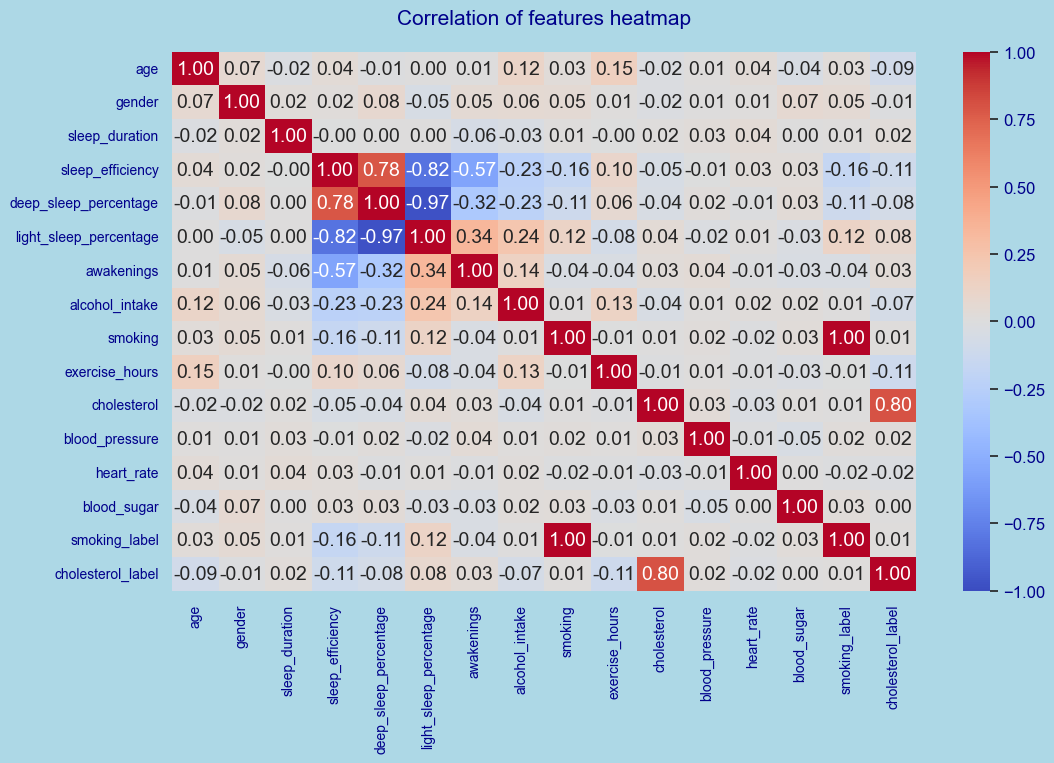

In [67]:
plt.figure(figsize=(12, 7))
# heatmap = sns.heatmap(heart_disease_df.corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap='flare',annot_kws={"fontsize":14}, fmt='.2f')
heatmap = sns.heatmap(combined_sleep_efficiency_heart_disease.corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap='coolwarm',annot_kws={"fontsize":14}, fmt='.2f')
sns.set(font_scale=2)
plt.title('Correlation of features heatmap',fontsize=15, color='darkblue', pad=20)
plt.xticks(color='darkblue', fontsize=10)
plt.yticks(color='darkblue', fontsize=10)

colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelcolor='darkblue', labelsize=12)

plt.gcf().patch.set_facecolor('lightblue')
plt.show()

In [68]:
len(combined_sleep_efficiency_heart_disease)

1452

In [69]:
combined_sleep_efficiency_heart_disease.columns

Index(['age', 'gender', 'sleep_duration', 'sleep_efficiency',
       'deep_sleep_percentage', 'light_sleep_percentage', 'awakenings',
       'alcohol_intake', 'smoking', 'exercise_hours', 'cholesterol',
       'blood_pressure', 'heart_rate', 'blood_sugar', 'smoking_label',
       'cholesterol_label'],
      dtype='object')

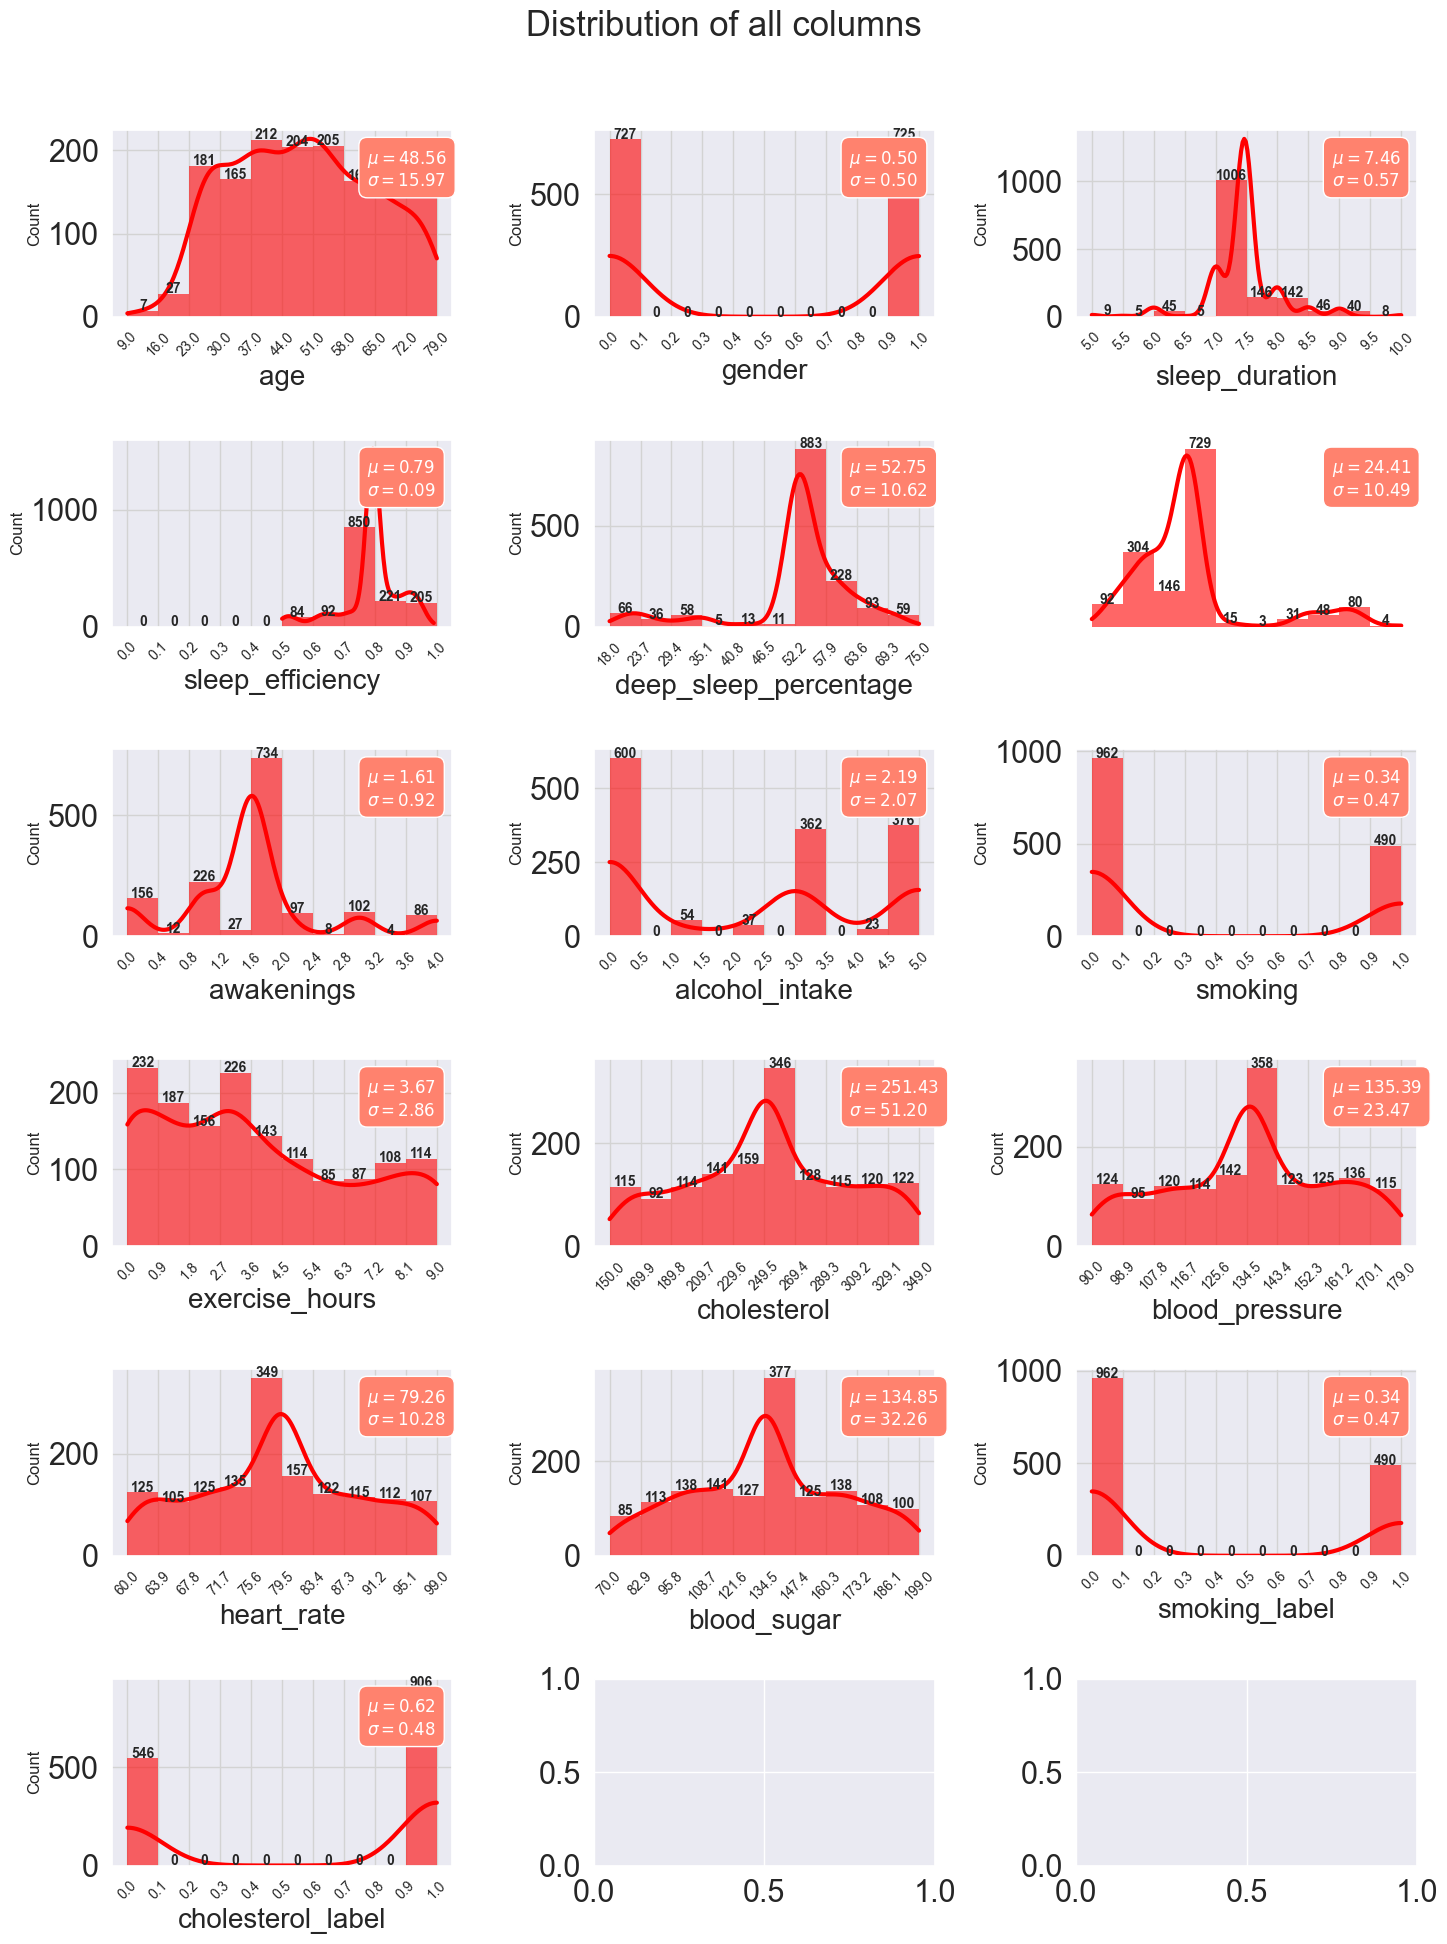

In [70]:
# Filter out continuous features for the univariate analysis
df_continuous = combined_sleep_efficiency_heart_disease

# Set up the subplot
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col], 
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))
    
    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=20)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45, fontsize=10)
    ax[x, y].grid(color='lightgrey')
    
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")
    
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Distribution of all columns', fontsize=25)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

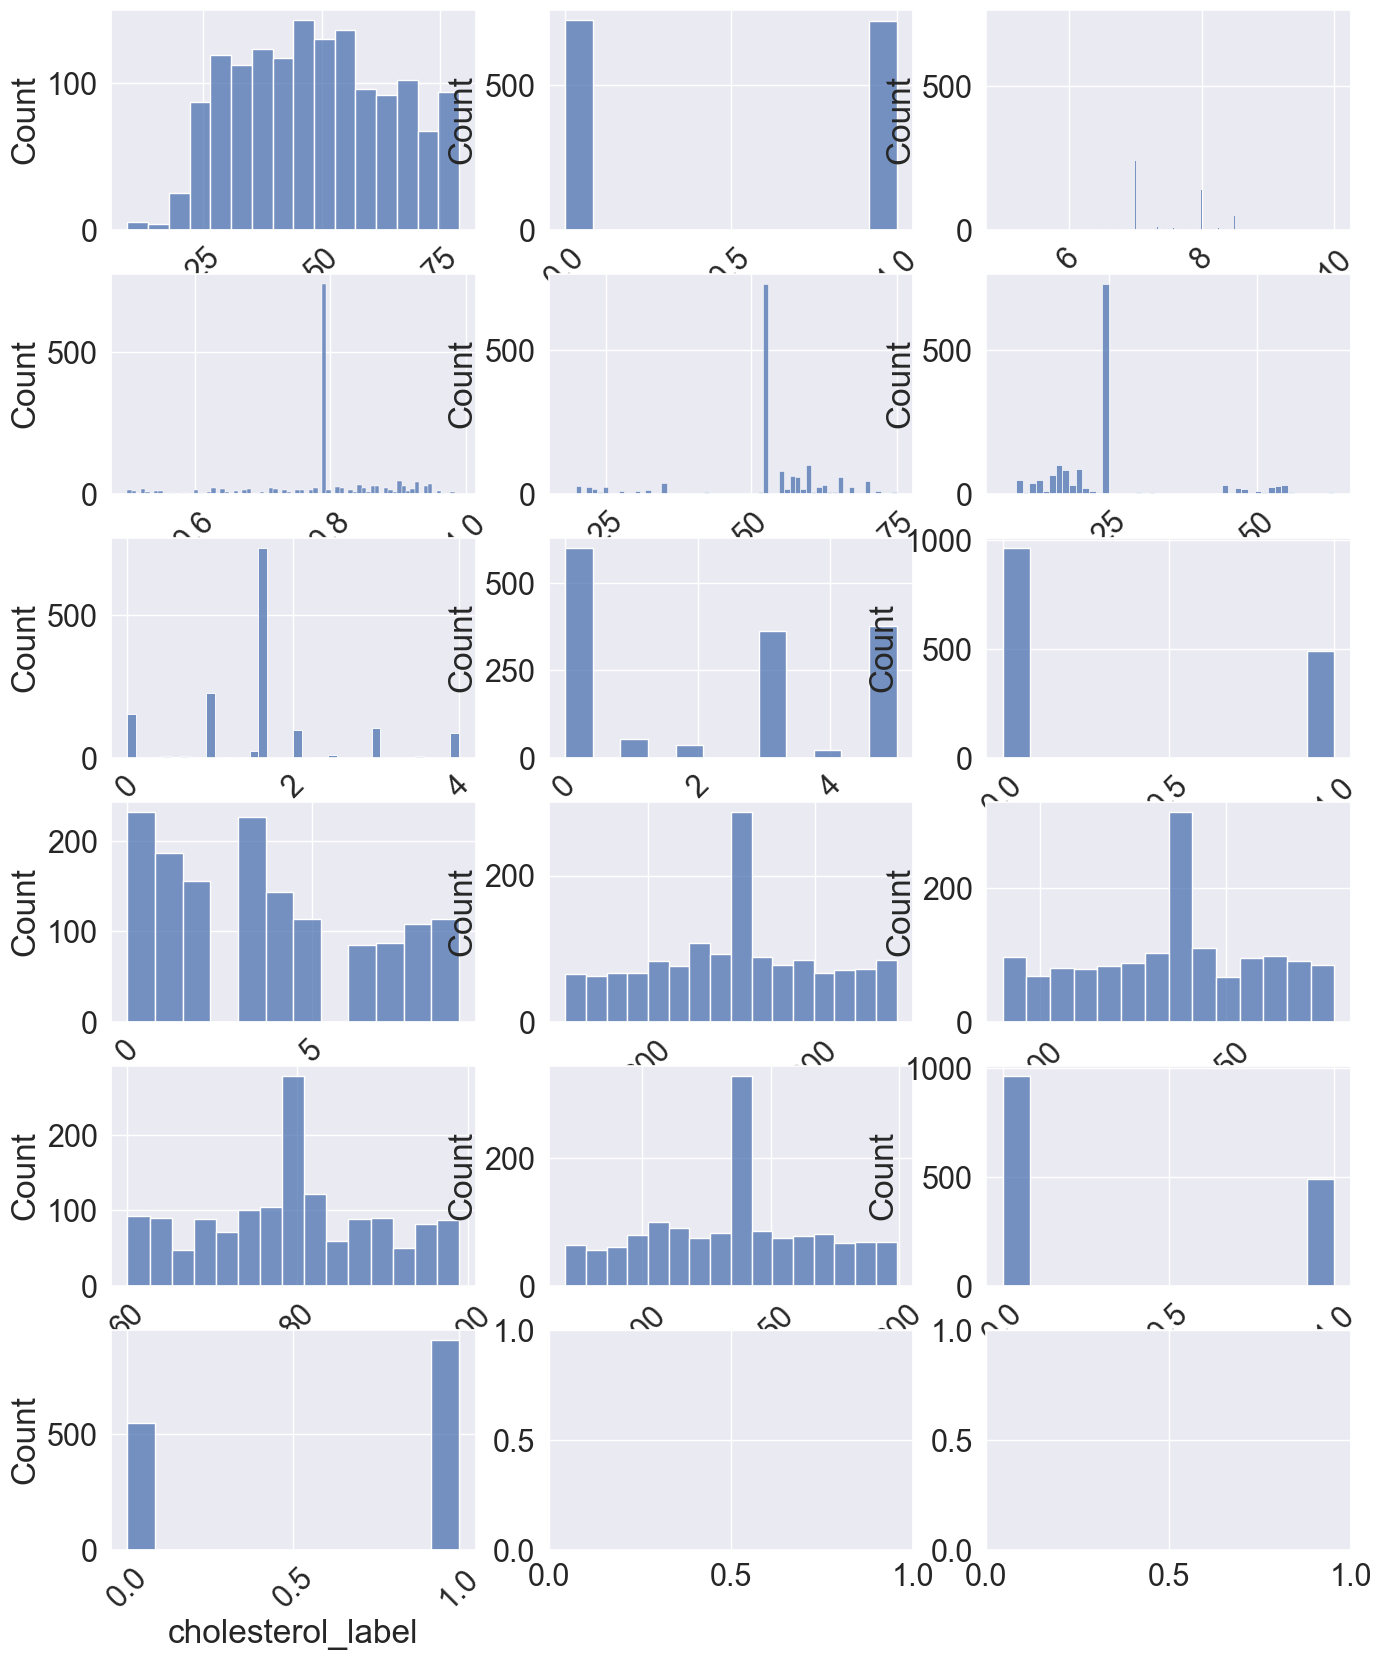

In [71]:
# Create a figure with 3 subplots per row
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16,20))
axes=axes.ravel()

# Use the first subplot to plot histograms
first_columns=['age', 'gender', 'sleep_duration', 'sleep_efficiency',
       'deep_sleep_percentage', 'light_sleep_percentage', 'awakenings',
       'alcohol_intake', 'smoking', 'exercise_hours', 'cholesterol',
       'blood_pressure', 'heart_rate', 'blood_sugar', 'smoking_label',
       'cholesterol_label']
for i, column in enumerate(first_columns):
    sns.histplot(data=combined_sleep_efficiency_heart_disease, x=column,ax=axes[i])
    # rotate the x-axis labels by 45 degrees
    axes[i].tick_params(axis='x', rotation=45)
# plt.xtick(fontsize=10)
plt.show()

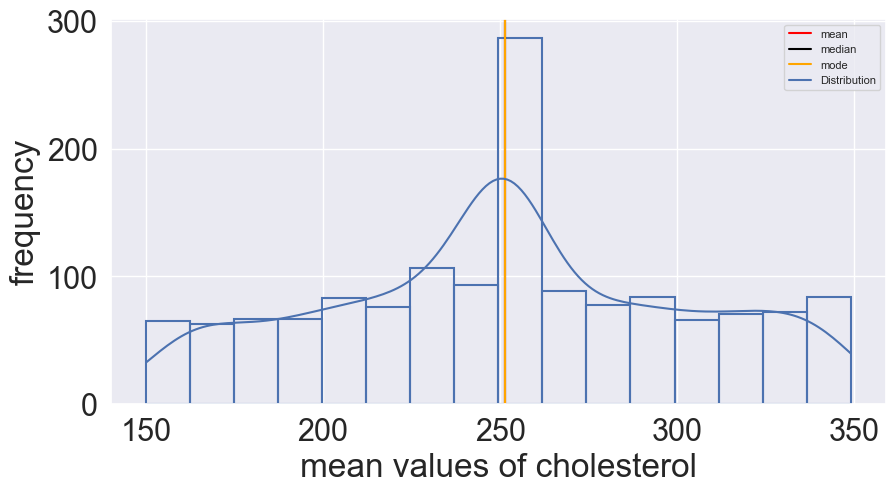

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
plt.axvline(combined_sleep_efficiency_heart_disease["cholesterol"].mean(), color="red")
plt.axvline(combined_sleep_efficiency_heart_disease["cholesterol"].median(), color="black")
plt.axvline(list(combined_sleep_efficiency_heart_disease["cholesterol"].mode())[0], color="orange")
plt.xlabel("mean values of cholesterol")
plt.ylabel("frequency")

# Plotting using Matplotlib
# plt.hist(my_normal_series)

# Plotting using Seaborn
#sns.displot(my_normal_series, kde=True)
sns.histplot(combined_sleep_efficiency_heart_disease["cholesterol"], kde=True, fill=False)

plt.legend(["mean", "median", "mode", "Distribution"], loc ="upper right", fontsize="8")
plt.show()

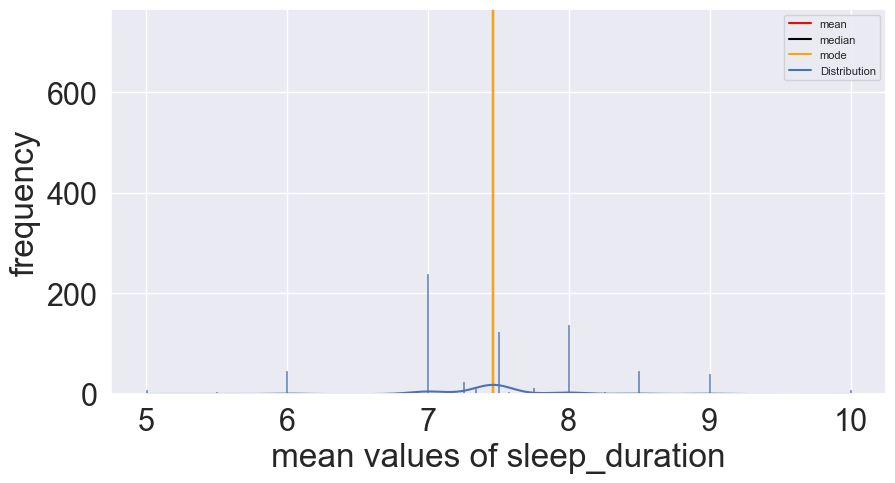

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
plt.axvline(combined_sleep_efficiency_heart_disease["sleep_duration"].mean(), color="red")
plt.axvline(combined_sleep_efficiency_heart_disease["sleep_duration"].median(), color="black")
plt.axvline(list(combined_sleep_efficiency_heart_disease["sleep_duration"].mode())[0], color="orange")
plt.xlabel("mean values of sleep_duration")
plt.ylabel("frequency")

sns.histplot(combined_sleep_efficiency_heart_disease["sleep_duration"], kde=True, fill=False)

plt.legend(["mean", "median", "mode", "Distribution"], loc ="upper right", fontsize="8")
plt.show()

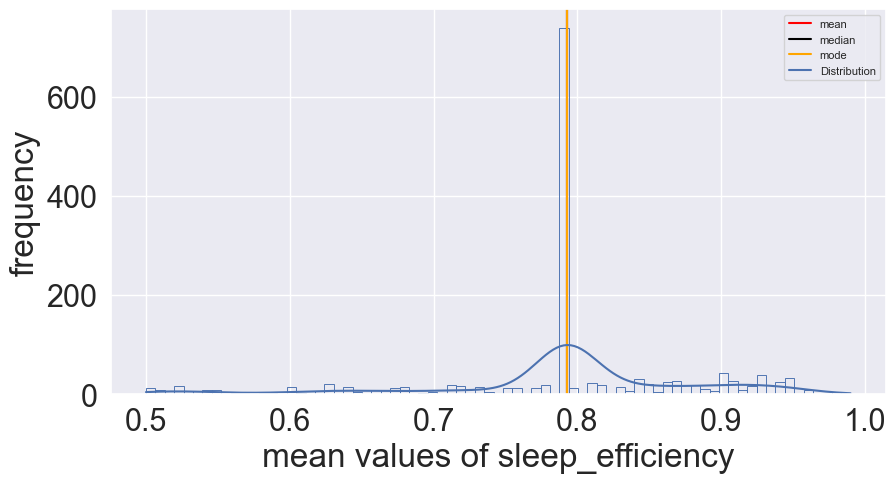

In [74]:
plt.figure(figsize=(10,5))
plt.axvline(combined_sleep_efficiency_heart_disease["sleep_efficiency"].mean(), color="red")
plt.axvline(combined_sleep_efficiency_heart_disease["sleep_efficiency"].median(), color="black")
plt.axvline(list(combined_sleep_efficiency_heart_disease["sleep_efficiency"].mode())[0], color="orange")
plt.xlabel("mean values of sleep_efficiency")
plt.ylabel("frequency")

# Plotting using Matplotlib
# plt.hist(my_normal_series)

# Plotting using Seaborn
#sns.displot(my_normal_series, kde=True)
sns.histplot(combined_sleep_efficiency_heart_disease["sleep_efficiency"], kde=True, fill=False)

plt.legend(["mean", "median", "mode", "Distribution"], loc ="upper right", fontsize="8")
plt.show()

In [75]:
combined_sleep_efficiency_heart_disease.columns

Index(['age', 'gender', 'sleep_duration', 'sleep_efficiency',
       'deep_sleep_percentage', 'light_sleep_percentage', 'awakenings',
       'alcohol_intake', 'smoking', 'exercise_hours', 'cholesterol',
       'blood_pressure', 'heart_rate', 'blood_sugar', 'smoking_label',
       'cholesterol_label'],
      dtype='object')

#### **(Stage-4) Split Dataset for "training" and "testing"**

In [76]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# This command splits the input data into training data and testing data
# Test data % is given. So remaining % of data will be used for Training.

mldata_split_output = train_test_split(combined_sleep_efficiency_heart_disease, test_size=0.2)  

In [77]:
len(combined_sleep_efficiency_heart_disease)

1452

Total Rows count: 1452<br>
Training Data   : 1161<br>
Testing Data    : 291

In [78]:
# Training Data
train_data = mldata_split_output[0]
len(mldata_split_output[0])

1161

In [79]:
# Testing Data
test_data = mldata_split_output[1]
len(mldata_split_output[1])

291

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report



# Define features and target variables
X = combined_sleep_efficiency_heart_disease.drop(['cholesterol_label', 'sleep_efficiency'], axis=1)
y_reg = combined_sleep_efficiency_heart_disease['sleep_efficiency']
y_clf = combined_sleep_efficiency_heart_disease['cholesterol_label']

# Split the data
X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(
    X, y_reg, y_clf, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(drop='first', sparse_output=False))
        ]), categorical_features)
    ])

# Regression models
reg_models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR()
}

# Classification models
clf_models = {
    'Decision Tree': DecisionTreeClassifier(),
    'SVC': SVC()
}

# Hyperparameter grids
reg_param_grids = {
    'Linear Regression': {},
    'SVR': {'regressor__C': [0.1, 1, 10], 'regressor__kernel': ['linear', 'rbf']}
}

clf_param_grids = {
    'Decision Tree': {'classifier__max_depth': [3, 5, 10], 'classifier__min_samples_split': [2, 5, 10]},
    'SVC': {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']}
}

# Train and evaluate regression models
print("Regression Models:")
best_reg_model = None
best_reg_score = float('-inf')

for name, model in reg_models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    grid_search = GridSearchCV(pipeline, reg_param_grids[name], cv=5, scoring='r2')
    grid_search.fit(X_train, y_reg_train)
    
    y_pred = grid_search.predict(X_test)
    mse = mean_squared_error(y_reg_test, y_pred)
    r2 = r2_score(y_reg_test, y_pred)
    
    print(f"{name}:")
    print(f"  Best parameters: {grid_search.best_params_}")
    print(f"  MSE: {mse:.4f}")
    print(f"  R2 Score: {r2:.4f}")
    
    if r2 > best_reg_score:
        best_reg_score = r2
        best_reg_model = grid_search.best_estimator_

print(f"\nBest Regression Model: {best_reg_model.named_steps['regressor'].__class__.__name__}")

# Train and evaluate classification models
print("\nClassification Models:")
best_clf_model = None
best_clf_score = float('-inf')

for name, model in clf_models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    grid_search = GridSearchCV(pipeline, clf_param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_clf_train)
    
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_clf_test, y_pred)
    
    print(f"{name}:")
    print(f"  Best parameters: {grid_search.best_params_}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Classification Report:\n{classification_report(y_clf_test, y_pred)}")
    
    if accuracy > best_clf_score:
        best_clf_score = accuracy
        best_clf_model = grid_search.best_estimator_

print(f"\nBest Classification Model: {best_clf_model.named_steps['classifier'].__class__.__name__}")

# # Save the best models
# import joblib

# joblib.dump(best_reg_model, 'best_regression_model.joblib')
# joblib.dump(best_clf_model, 'best_classification_model.joblib')

# print("\nBest models saved as 'best_regression_model.joblib' and 'best_classification_model.joblib'")

Regression Models:
Linear Regression:
  Best parameters: {}
  MSE: 0.0016
  R2 Score: 0.7944
SVR:
  Best parameters: {'regressor__C': 1, 'regressor__kernel': 'linear'}
  MSE: 0.0024
  R2 Score: 0.6965

Best Regression Model: LinearRegression

Classification Models:
Decision Tree:
  Best parameters: {'classifier__max_depth': 3, 'classifier__min_samples_split': 2}
  Accuracy: 1.0000
  Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       180

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291

SVC:
  Best parameters: {'classifier__C': 10, 'classifier__kernel': 'linear'}
  Accuracy: 0.9897
  Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       111
           1       1.00      0.98

In [81]:
# Define features and target variables
X = combined_sleep_efficiency_heart_disease.drop(['smoking_label', 'sleep_duration'], axis=1)
y_reg = combined_sleep_efficiency_heart_disease['sleep_duration']
y_clf = combined_sleep_efficiency_heart_disease['smoking_label']

# Split the data
X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(
    X, y_reg, y_clf, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(drop='first', sparse_output=False))
        ]), categorical_features)
    ])

# Regression models
reg_models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR()
}

# Classification models
clf_models = {
    'Decision Tree': DecisionTreeClassifier(),
    'SVC': SVC()
}

# Hyperparameter grids
reg_param_grids = {
    'Linear Regression': {},
    'SVR': {'regressor__C': [0.1, 1, 10], 'regressor__kernel': ['linear', 'rbf']}
}

clf_param_grids = {
    'Decision Tree': {'classifier__max_depth': [3, 5, 10], 'classifier__min_samples_split': [2, 5, 10]},
    'SVC': {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']}
}

# Train and evaluate regression models
print("Regression Models:")
best_reg_model = None
best_reg_score = float('-inf')

for name, model in reg_models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    grid_search = GridSearchCV(pipeline, reg_param_grids[name], cv=5, scoring='r2')
    grid_search.fit(X_train, y_reg_train)
    
    y_pred = grid_search.predict(X_test)
    mse = mean_squared_error(y_reg_test, y_pred)
    r2 = r2_score(y_reg_test, y_pred)
    
    print(f"{name}:")
    print(f"  Best parameters: {grid_search.best_params_}")
    print(f"  MSE: {mse:.4f}")
    print(f"  R2 Score: {r2:.4f}")
    
    if r2 > best_reg_score:
        best_reg_score = r2
        best_reg_model = grid_search.best_estimator_

print(f"\nBest Regression Model: {best_reg_model.named_steps['regressor'].__class__.__name__}")

# Train and evaluate classification models
print("\nClassification Models:")
best_clf_model = None
best_clf_score = float('-inf')

for name, model in clf_models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    grid_search = GridSearchCV(pipeline, clf_param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_clf_train)
    
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_clf_test, y_pred)
    
    print(f"{name}:")
    print(f"  Best parameters: {grid_search.best_params_}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Classification Report:\n{classification_report(y_clf_test, y_pred)}")
    
    if accuracy > best_clf_score:
        best_clf_score = accuracy
        best_clf_model = grid_search.best_estimator_

print(f"\nBest Classification Model: {best_clf_model.named_steps['classifier'].__class__.__name__}")

Regression Models:
Linear Regression:
  Best parameters: {}
  MSE: 0.3559
  R2 Score: -0.0185
SVR:
  Best parameters: {'regressor__C': 1, 'regressor__kernel': 'rbf'}
  MSE: 0.3702
  R2 Score: -0.0595

Best Regression Model: LinearRegression

Classification Models:
Decision Tree:
  Best parameters: {'classifier__max_depth': 3, 'classifier__min_samples_split': 2}
  Accuracy: 1.0000
  Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00        99

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291

SVC:
  Best parameters: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}
  Accuracy: 1.0000
  Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00

### Cross-Validation

For Linear Regression, and SVR for sleep_efficiency Prediction

In [82]:
X = train_data.drop(columns=["sleep_efficiency"])
y = train_data["sleep_efficiency"]

In [83]:
my_algorithm1 = LinearRegression()
scores1 = cross_val_score(my_algorithm1, X, y, cv=5)
print(scores1)
print(scores1.mean())

[0.81025311 0.77049216 0.83082032 0.7423389  0.75593599]
0.781968097333845


In [84]:
my_algorithm2_linear = SVR(kernel="linear")
scores2_linear = cross_val_score(my_algorithm2_linear, X, y, cv=5)
print(scores2_linear)
print(scores2_linear.mean())

[  0.73540945   0.71528275   0.78389317 -21.66249088   0.67723282]
-3.7501345395161962


In [85]:
# SVR(kernel='rbf')
my_algorithm2_rbf = SVR(kernel="rbf")
scores2_rbf = cross_val_score(my_algorithm2_rbf, X, y, cv=5)
print(scores2_rbf)
print(scores2_rbf.mean())

[0.63481915 0.67596788 0.68583214 0.64531914 0.6623912 ]
0.6608659019799379


In [86]:
#SVR(kernel="poly")
my_algorithm2_poly = SVR(kernel="poly")
scores2_poly = cross_val_score(my_algorithm2_poly, X, y, cv=5)
print(scores2_poly)
print(scores2_poly.mean())

[0.63862182 0.64256011 0.70292686 0.68974011 0.65840059]
0.6664498971993419


#### **(Stage-5) Apply "ML algorithm" to the "training" data ---> Create "model"**

For Linear Regression & SVR

In [87]:
# Model-1 - LinearRegression - Using all Features except the target for ML model Training
model1 = LinearRegression().fit(X = train_data.drop(columns=["sleep_efficiency"]), y = train_data["sleep_efficiency"])

In [88]:
# Model-2 - SVR - Using all Features except the target for ML model Training
model2 = SVR(kernel="rbf").fit(X = train_data.drop(columns=["sleep_efficiency"]), y = train_data["sleep_efficiency"])

In [89]:
y_predicted_model1 = model1.predict(X = test_data.drop(columns=["sleep_efficiency"]))
y_predicted_model2 = model2.predict(X = test_data.drop(columns=["sleep_efficiency"]))

In [90]:
y_true = test_data["sleep_efficiency"]

#### **(Stage-6) Evalute the "model" with the "testing" data ---> Make "prediction"**

In [91]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [92]:
# Model-1 - Using all Features except the target for ML model Training
print("model-1 r2_score:", r2_score(y_true, y_predicted_model1))
print("model-1 mean_absolute_error:", mean_absolute_error(y_true, y_predicted_model1))
print("model-1 mean_squared_error:", mean_squared_error(y_true, y_predicted_model1))
print("-------------------------")

# Model-2 - Using all Features except the target for ML model Training
print("model-2 r2_score:", r2_score(y_true, y_predicted_model2))
print("model-2 mean_absolute_error:", mean_absolute_error(y_true, y_predicted_model2))
print("model-2 mean_squared_error:", mean_squared_error(y_true, y_predicted_model2))

model-1 r2_score: 0.7647124448794691
model-1 mean_absolute_error: 0.027783968172491198
model-1 mean_squared_error: 0.001814659508917132
-------------------------
model-2 r2_score: 0.6138793482150302
model-2 mean_absolute_error: 0.0381938911025269
model-2 mean_squared_error: 0.0029779624850619045


<b>The above scores shows that Linear Regression model is working better than SVR to predict the sleep Efficiency.</b>

Scaling features ensures that they have a standard normal <br>
distribution with a mean of 0 and a standard deviation of 1. 

In [118]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select features and target variable
features = ['age', 'gender', 'deep_sleep_percentage',
       'light_sleep_percentage', 'awakenings', 'alcohol_intake', 'smoking',
       'exercise_hours', 'cholesterol', 'blood_pressure', 'heart_rate',
       'blood_sugar', 'cholesterol_label']
target = 'sleep_efficiency'

X = combined_sleep_efficiency_heart_disease[features]
y = combined_sleep_efficiency_heart_disease[target]



# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(combined_sleep_efficiency_heart_disease)


In [111]:
pd.DataFrame(X_train_scaled)

0         1         2         3         4         5         6   \
0     0.580707 -0.992278  0.012388 -0.014299  0.004855 -1.050183 -0.712595   
1    -0.485967  1.007782  0.012388 -0.014299  0.004855  1.369949 -0.712595   
2    -0.423222  1.007782  0.012388 -0.014299  0.004855  0.401896 -0.712595   
3     1.521890 -0.992278  0.012388 -0.014299  0.004855  0.401896 -0.712595   
4     1.019926  1.007782 -1.636308  1.919786  2.624566 -0.566157 -0.712595   
...        ...       ...       ...       ...       ...       ...       ...   
1156 -0.172239  1.007782  0.221814 -0.615831 -1.751498  0.401896  1.403321   
1157 -0.548713 -0.992278  0.012388 -0.014299  0.004855  1.369949 -0.712595   
1158  0.768943 -0.992278 -2.844088  2.858903  0.436534  0.401896 -0.712595   
1159 -0.046748 -0.992278  0.805796 -0.843903 -1.126346 -1.050183 -0.712595   
1160 -1.427150  1.007782  0.012388 -0.014299  0.004855  1.369949 -0.712595   

            7         8         9         10        11        12  
0     0.118498  1.780883  1.666505  0.919807  1.837214  0.774063  
1    -1.274679 -1.824024 -0.502169 -0.799355  1.806407 -1.291884  
2     1.163381  1.505098 -0.927399 -1.849954  1.128653  0.774063  
3    -1.274679 -0.504195  1.198752 -1.754445  0.296863 -1.291884  
4    -0.926385 -0.003317 -0.018034 -0.010496  0.014853  0.774063  
...        ...       ...       ...       ...       ...       ...  
1156  0.815086  0.835334 -1.140014  1.683879 -0.226856  0.774063  
1157 -0.229796 -1.252755 -0.799830 -1.658936  1.652372 -1.291884  
1158  1.511675 -0.464797 -0.502169  1.683879  1.375109 -1.291884  
1159 -0.926385  1.899077  0.050630  1.874896  1.067039  0.774063  
1160  1.163381 -1.804325 -1.352630 -1.181391  1.005425 -1.291884  

[1161 rows x 13 columns]

In [119]:
import pandas as pd

# Convert X_train_scaled to a DataFrame and set the column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=combined_sleep_efficiency_heart_disease.columns)

# Now you can use X_train_scaled_df as a DataFrame with the desired column names


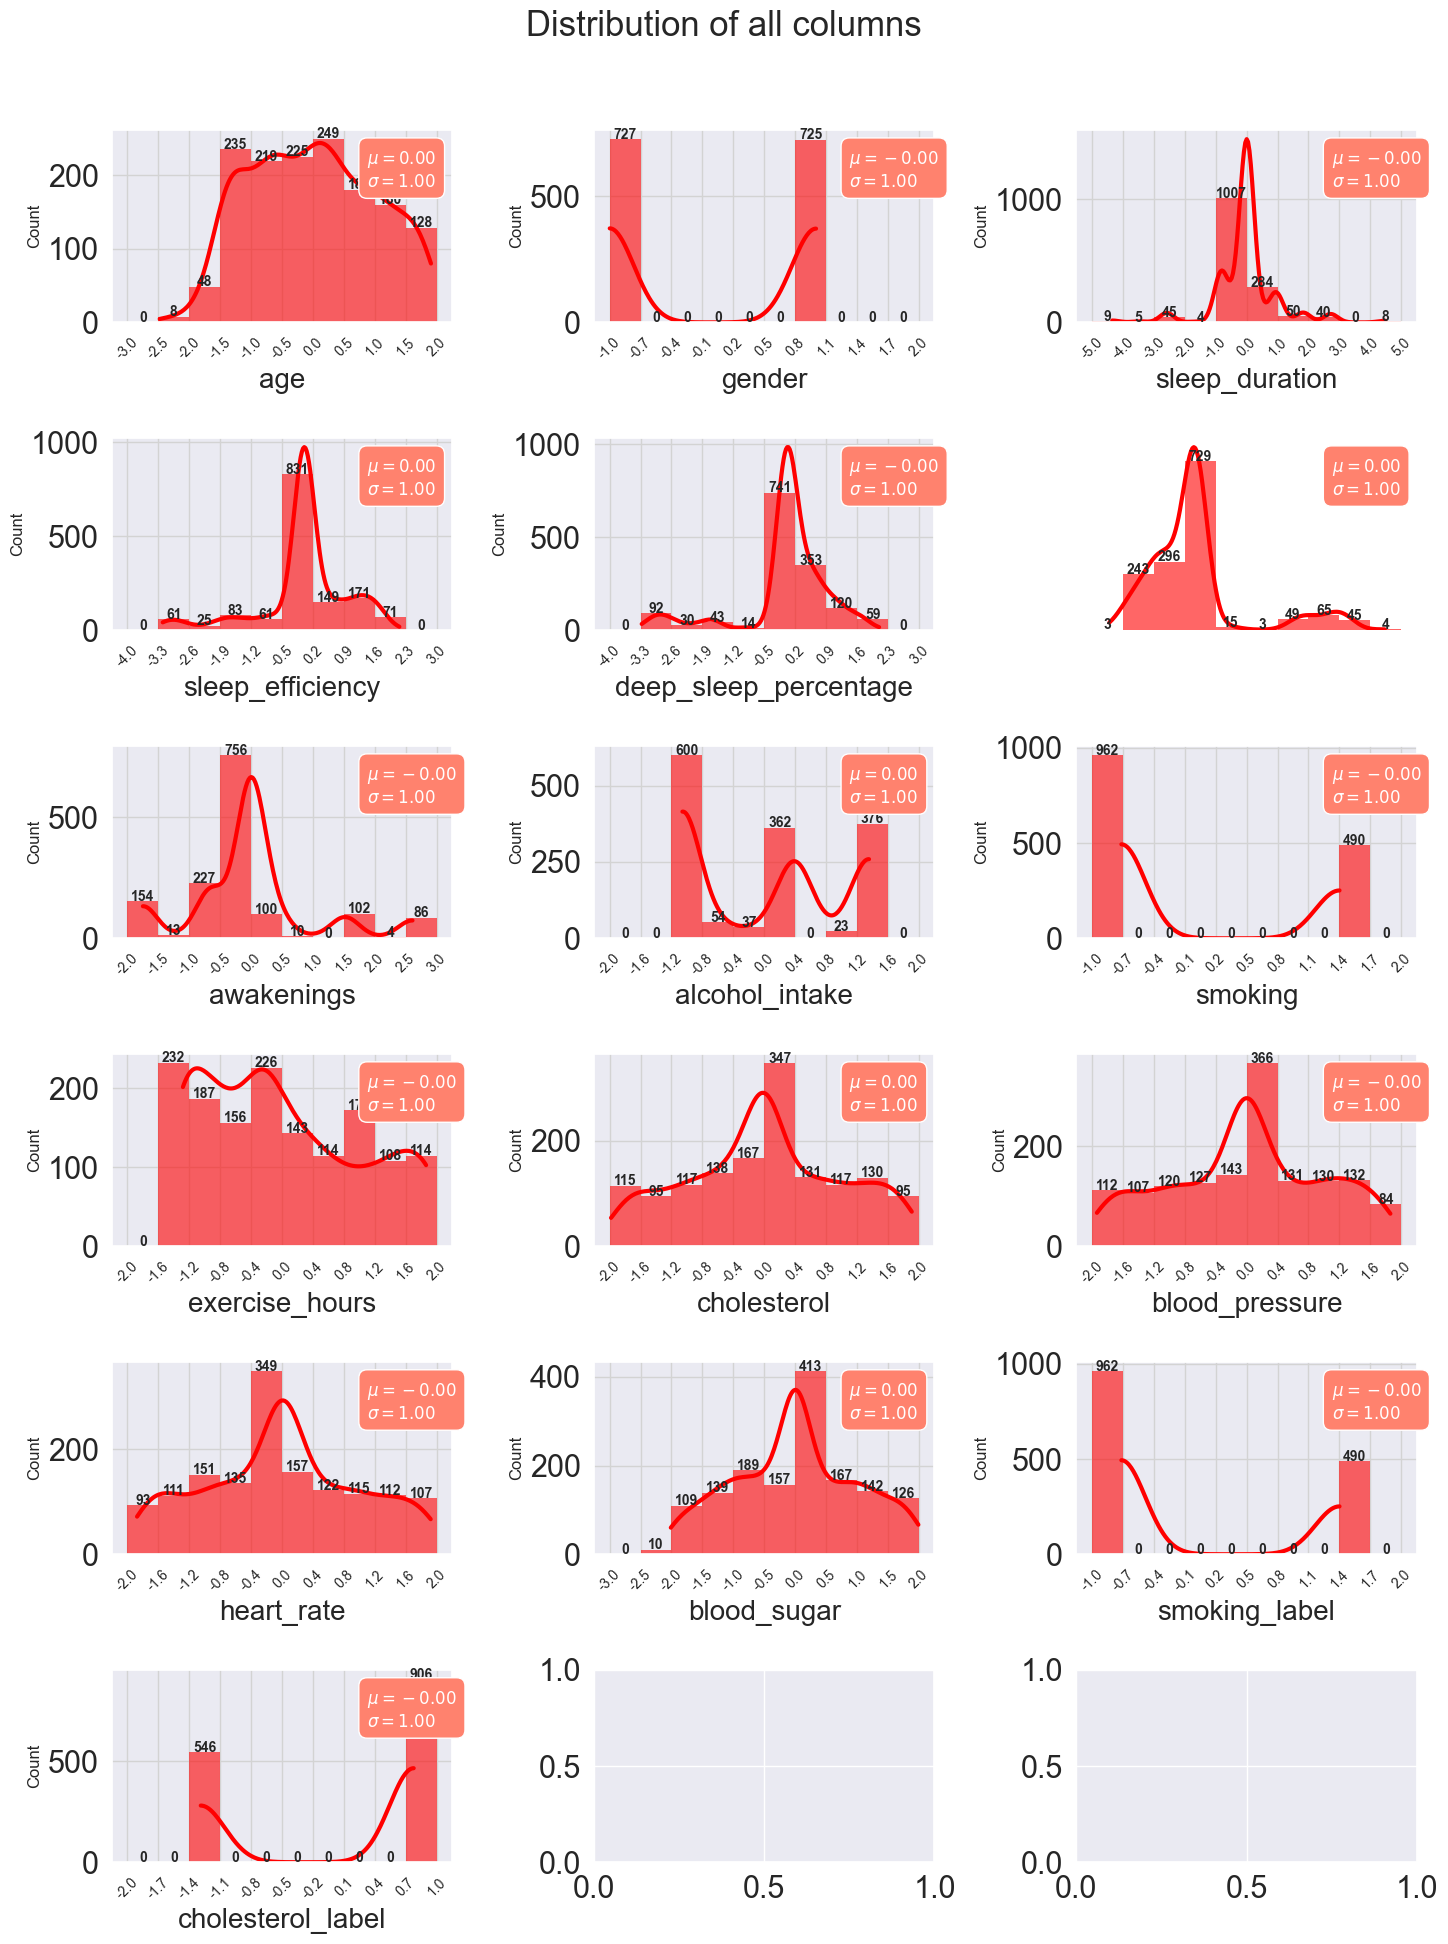

In [120]:
# import numpy as np
# Filter out continuous features for the univariate analysis
df_continuous = X_train_scaled_df

# Set up the subplot
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col], 
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))
    
    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=20)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45, fontsize=10)
    ax[x, y].grid(color='lightgrey')
    
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")
    
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Distribution of all columns', fontsize=25)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

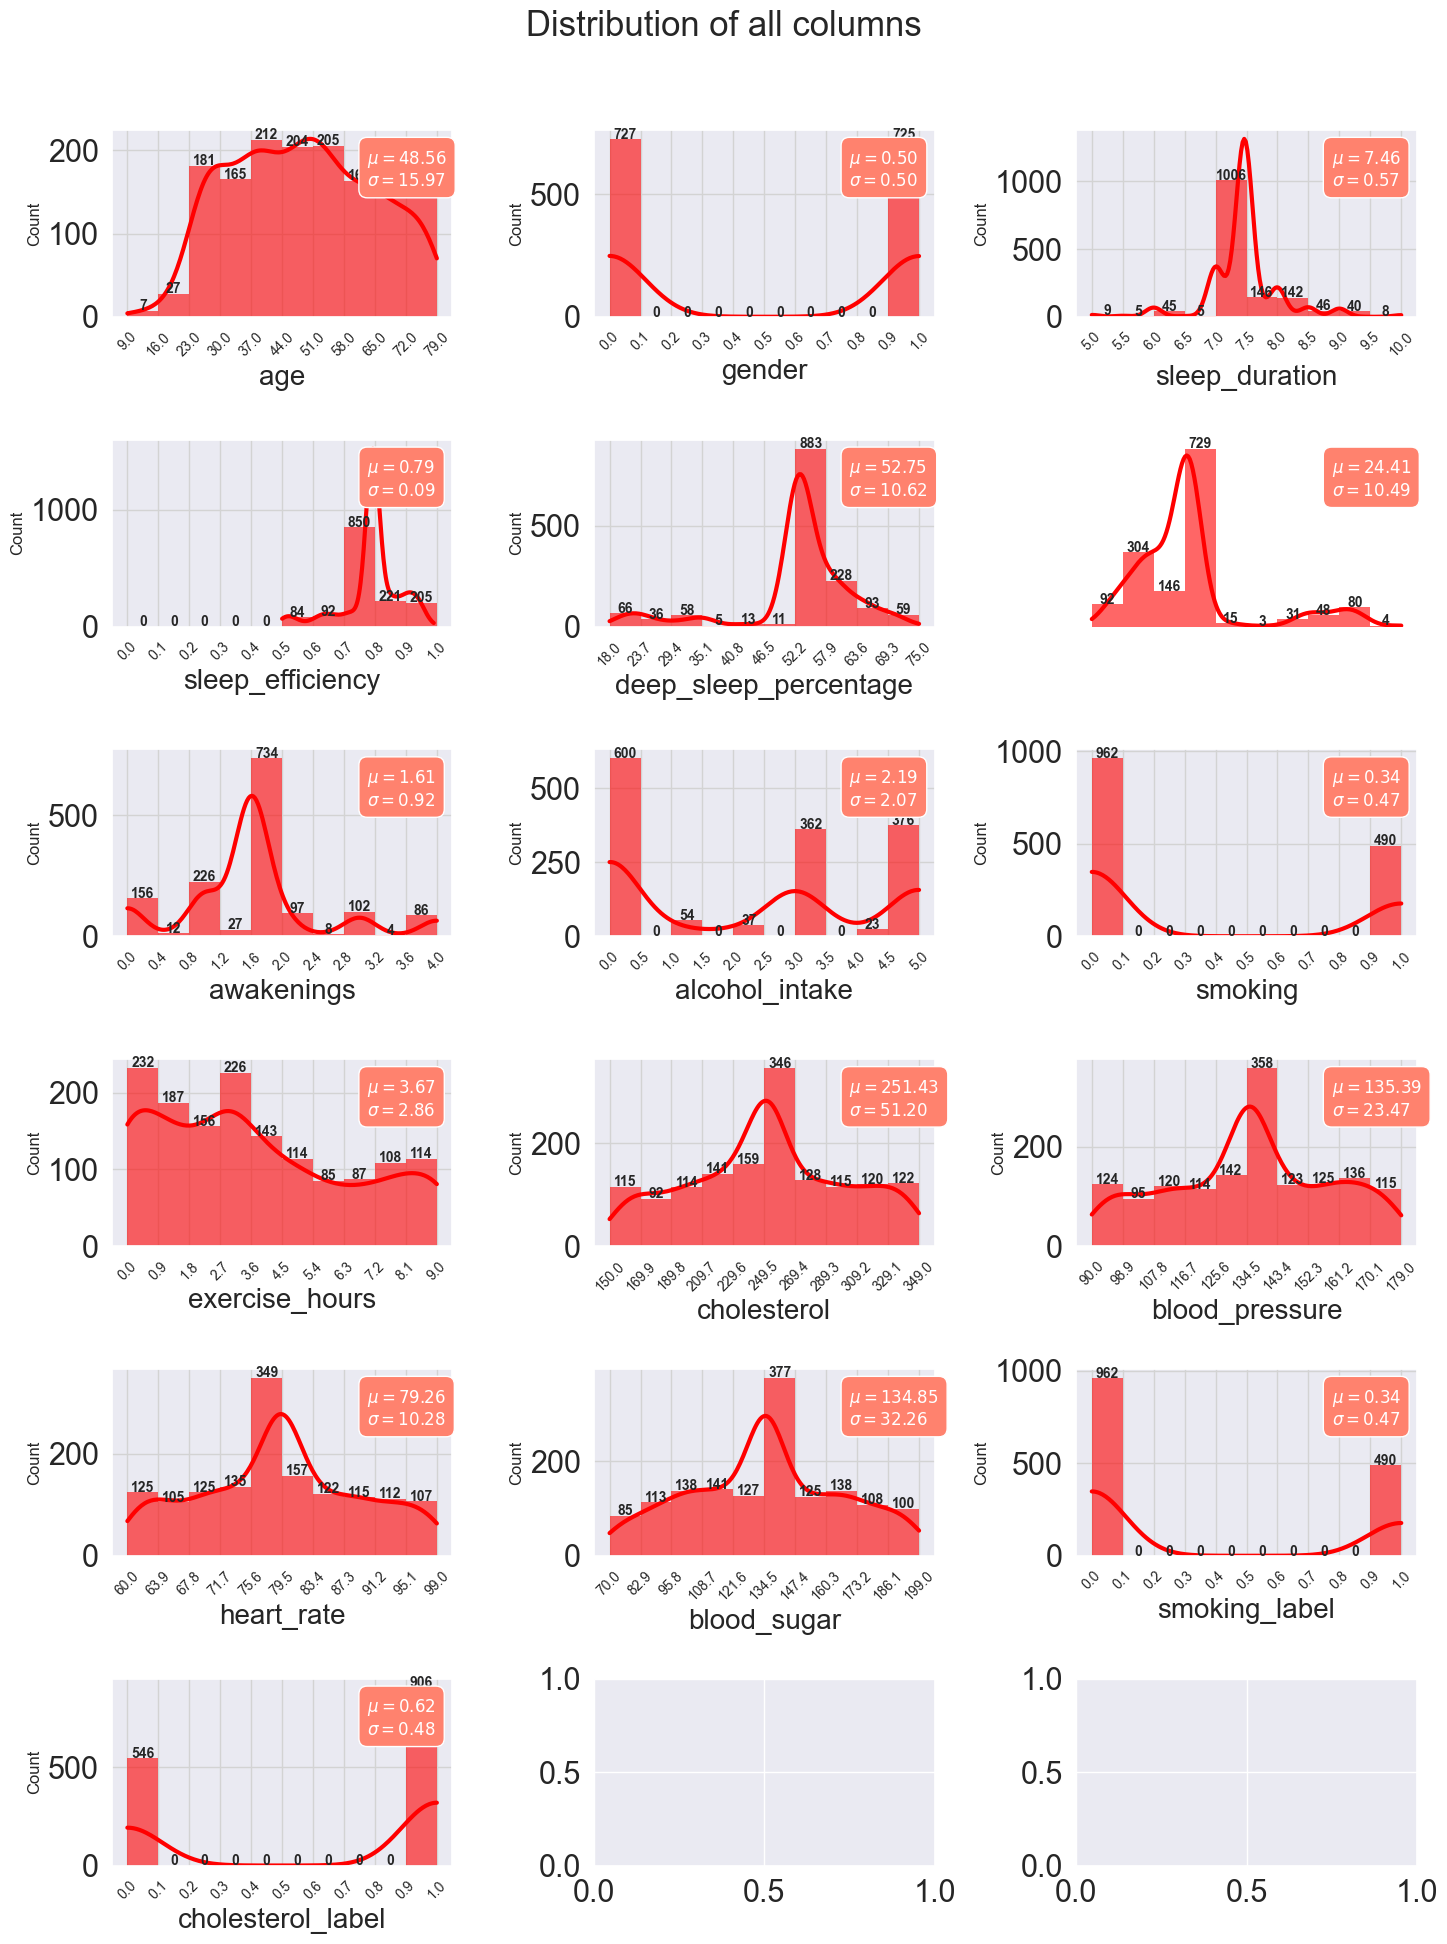

In [113]:
# Filter out continuous features for the univariate analysis
df_continuous = combined_sleep_efficiency_heart_disease

# Set up the subplot
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col], 
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))
    
    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=20)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45, fontsize=10)
    ax[x, y].grid(color='lightgrey')
    
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")
    
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Distribution of all columns', fontsize=25)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

Scale the features

In [93]:
from sklearn.preprocessing import StandardScaler

# Select features and target variable
features = ['age', 'gender', 'deep_sleep_percentage',
       'light_sleep_percentage', 'awakenings', 'alcohol_intake', 'smoking',
       'exercise_hours', 'cholesterol', 'blood_pressure', 'heart_rate',
       'blood_sugar', 'cholesterol_label']
target = 'sleep_efficiency'

X = combined_sleep_efficiency_heart_disease[features]
y = combined_sleep_efficiency_heart_disease[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print("Linear Regression Results:")
print(f"Mean Squared Error: {lr_mse}")
print(f"R-squared Score: {lr_r2}")

# Support Vector Regression
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
svr_predictions = svr_model.predict(X_test_scaled)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)

print("\nSupport Vector Regression Results:")
print(f"Mean Squared Error: {svr_mse}")
print(f"R-squared Score: {svr_r2}")

Linear Regression Results:
Mean Squared Error: 0.001565003070292101
R-squared Score: 0.7984306156082853

Support Vector Regression Results:
Mean Squared Error: 0.002225104952850616
R-squared Score: 0.7134107631690838


<b>The above scores shows that Linear Regression model is working better than SVR to predict the sleep Efficiency.</b>

### Supervised Machine Learning Algorithms - For DecisionTreeClassifier and SVC

In [94]:
test = create_scrollable_table(pd.DataFrame(combined_sleep_efficiency_heart_disease["cholesterol_label"]), 'Test', 'Test')
display(HTML(test))

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Select features and target variable
features = ['age', 'gender', 'sleep_duration', 'sleep_efficiency',
       'deep_sleep_percentage', 'light_sleep_percentage', 'awakenings',
       'alcohol_intake', 'smoking', 'exercise_hours', 'cholesterol',
       'blood_pressure', 'heart_rate', 'blood_sugar', 'smoking_label']
# features = ['age', 'gender', 'sleep_duration', 'sleep_efficiency',
#        'deep_sleep_percentage', 'light_sleep_percentage', 'awakenings',
#        'alcohol_intake', 'smoking', 'exercise_hours', 
#        'blood_pressure', 'heart_rate', 'blood_sugar', 'smoking_label']
target = 'cholesterol_label'  # Assuming 'cholesterol_label' is the target variable for classification

X = combined_sleep_efficiency_heart_disease[features]
y = combined_sleep_efficiency_heart_disease[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree Classifier
dtc_model = DecisionTreeClassifier(max_depth=2)
dtc_model.fit(X_train_scaled, y_train)
dtc_predictions = dtc_model.predict(X_test_scaled)
dtc_accuracy = accuracy_score(y_test, dtc_predictions)
dtc_report = classification_report(y_test, dtc_predictions)

print("Decision Tree Classifier Results:")
print(f"Accuracy: {dtc_accuracy}")
print("Classification Report:")
print(dtc_report)

# Support Vector Classifier
svc_model = SVC(kernel='linear')
svc_model.fit(X_train_scaled, y_train)
svc_predictions = svc_model.predict(X_test_scaled)
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_report = classification_report(y_test, svc_predictions)

print("\nSupport Vector Classifier Results:")
print(f"Accuracy: {svc_accuracy}")
print("Classification Report:")
print(svc_report)

Decision Tree Classifier Results:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       180

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291


Support Vector Classifier Results:
Accuracy: 0.9862542955326461
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       111
           1       1.00      0.98      0.99       180

    accuracy                           0.99       291
   macro avg       0.98      0.99      0.99       291
weighted avg       0.99      0.99      0.99       291



Do PCA - Applying Classification - Cross-Validation

In [96]:
from sklearn.decomposition import PCA
X = combined_sleep_efficiency_heart_disease
pca = PCA(n_components=2).fit(X)

In [97]:
pca.explained_variance_ratio_

array([0.5453037 , 0.21688759])

In [98]:
pca_output = pca.fit_transform(X)
pca_output.shape

(1452, 2)

In [99]:
my_algorithm = LinearRegression()

#X = pd.DataFrame(pca_output)
X = pd.DataFrame(pd.DataFrame(pca_output)[0])
y = combined_sleep_efficiency_heart_disease["sleep_efficiency"]

scores = cross_val_score(my_algorithm, X, y, cv=5)
scores

array([ 0.00260739, -0.00760465,  0.00868895, -0.00228884,  0.00469068])

In [100]:
my_algorithm = SVR(kernel="rbf")

#X = pd.DataFrame(pca_output)
X = pd.DataFrame(pd.DataFrame(pca_output)[0])
y = combined_sleep_efficiency_heart_disease["sleep_efficiency"]

scores = cross_val_score(my_algorithm, X, y, cv=5)
scores

array([ 0.01311359, -0.0784229 , -0.09923942, -0.15694198, -0.12468536])

my_algorithm = DecisionTreeClassifier(max_depth=2)<br>
X = pd.DataFrame(pd.DataFrame(pca_output)[0])<br>
y = combined_sleep_efficiency_heart_disease["cholesterol_label"]<br>
scores = cross_val_score(my_algorithm, X, y, cv=2)

In [101]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

my_algorithm = DecisionTreeClassifier(max_depth=2)
X = pd.DataFrame(pd.DataFrame(pca_output)[0])
y = combined_sleep_efficiency_heart_disease["cholesterol_label"]
scores = cross_val_score(my_algorithm, X, y, cv=2)
scores

array([0.99862259, 0.99449036])

In [102]:
my_algorithm = SVC(kernel='rbf')
X = pd.DataFrame(pd.DataFrame(pca_output)[0])
y = combined_sleep_efficiency_heart_disease["cholesterol_label"]
scores = cross_val_score(my_algorithm, X, y, cv=2)
scores

array([0.97107438, 0.98760331])

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Select features and target variable
features = ['age', 'gender', 'sleep_duration', 'sleep_efficiency',
       'deep_sleep_percentage', 'light_sleep_percentage', 'awakenings',
       'alcohol_intake', 'smoking', 'exercise_hours', 'cholesterol',
       'blood_pressure', 'heart_rate', 'blood_sugar', 'smoking_label']
# features = ['age', 'gender', 'sleep_duration', 'sleep_efficiency',
#        'deep_sleep_percentage', 'light_sleep_percentage', 'awakenings',
#        'alcohol_intake', 'smoking', 'exercise_hours', 
#        'blood_pressure', 'heart_rate', 'blood_sugar', 'smoking_label']
target = 'cholesterol_label'  # Assuming 'cholesterol_label' is the target variable for classification

# X = combined_sleep_efficiency_heart_disease[features]
# y = combined_sleep_efficiency_heart_disease[target]

X = pd.DataFrame(pd.DataFrame(pca_output)[0])
y = combined_sleep_efficiency_heart_disease["cholesterol_label"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

y_true = y_test
# # Scale the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Decision Tree Classifier
dtc_model = DecisionTreeClassifier(max_depth=2)
dtc_model.fit(X_train, y_train)
dtc_predictions = dtc_model.predict(X_test)
dtc_accuracy = accuracy_score(y_test, dtc_predictions)
dtc_report = classification_report(y_test, dtc_predictions)

print("Decision Tree Classifier Results:")
print(f"Accuracy: {dtc_accuracy}")
print("Classification Report:")
print(dtc_report)

# Support Vector Classifier
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_report = classification_report(y_test, svc_predictions)

print("\nSupport Vector Classifier Results:")
print(f"Accuracy: {svc_accuracy}")
print("Classification Report:")
print(svc_report)

Decision Tree Classifier Results:
Accuracy: 0.9986225895316805
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00       442

    accuracy                           1.00       726
   macro avg       1.00      1.00      1.00       726
weighted avg       1.00      1.00      1.00       726


Support Vector Classifier Results:
Accuracy: 0.9958677685950413
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       284
           1       1.00      0.99      1.00       442

    accuracy                           1.00       726
   macro avg       0.99      1.00      1.00       726
weighted avg       1.00      1.00      1.00       726



In [104]:
y_test

584    0
672    0
545    1
864    1
77     0
      ..
249    1
851    1
594    0
71     1
94     1
Name: cholesterol_label, Length: 726, dtype: int64

In [105]:
tn, fp, fn, tp = confusion_matrix(y_true, dtc_predictions).ravel()
print("------------------------")
print("Confusion Matrix output - model-1 (DecisionTreeClassifier)")
print("------------------------")
print("tn - True Negative", tn)
print("fp - False Positive", fp)
print("fn - False Negative", fn)
print("tp - True Positive", tp)

tn, fp, fn, tp = confusion_matrix(y_true, svc_predictions).ravel()
print("------------------------")
print("Confusion Matrix output - model-2 (SVC)")
print("------------------------")
print("tn - True Negative", tn)
print("fp - False Positive", fp)
print("fn - False Negative", fn)
print("tp - True Positive", tp)

NameError: name 'confusion_matrix' is not defined

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [ ]:
X = train_data.drop(columns=["cholesterol_label"])
y = train_data["cholesterol_label"]

my_algorithm1 = DecisionTreeClassifier(max_depth=2)
# my_algorithm1 = DecisionTreeClassifier()
scores1 = cross_val_score(my_algorithm1, X, y, cv=2)
print(scores1)
print(scores1.mean())

[1. 1.]
1.0


In [ ]:
# SVR(kernel='linear')
my_algorithm2_linear = SVC(kernel="linear")
scores2_linear = cross_val_score(my_algorithm2_linear, X, y, cv=5)
print(scores2_linear)
print(scores2_linear.mean())

[1.         1.         0.99137931 0.99568966 1.        ]
0.9974137931034482


In [ ]:
# SVR(kernel='rbf')
my_algorithm2_rbf = SVC(kernel="rbf")
scores2_rbf = cross_val_score(my_algorithm2_rbf, X, y, cv=5)
print(scores2_rbf)
print(scores2_rbf.mean())

[0.96995708 0.9612069  0.95689655 0.93534483 0.97413793]
0.9595086576883232


In [ ]:
#SVR(kernel="poly")
my_algorithm2_poly = SVC(kernel="poly")
scores2_poly = cross_val_score(my_algorithm2_poly, X, y, cv=5)
print(scores2_poly)
print(scores2_poly.mean())

[0.99570815 0.99568966 0.97413793 0.99137931 1.        ]
0.9913830102116323


In [ ]:
# Model-1 - Using all Features except the target for ML model Training
model1 = DecisionTreeClassifier(max_depth=2).fit(X = train_data.drop(columns=["cholesterol_label"]), y = train_data["cholesterol_label"])

In [ ]:
# Model-2 - Using all Features except the target for ML model Training
model2 = SVC(kernel="rbf").fit(X = train_data.drop(columns=["cholesterol_label"]), y = train_data["cholesterol_label"])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Ensure the target variable is binary
le = LabelEncoder()

In [ ]:
y_true = test_data["cholesterol_label"]
# y_true = le.fit_transform(y_true)

In [ ]:
y_predicted_model1 = model1.predict(X = test_data.drop(columns=["cholesterol_label"]))
y_predicted_model2 = model2.predict(X = test_data.drop(columns=["cholesterol_label"]))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_true, y_predicted_model1).ravel()
print("------------------------")
print("Confusion Matrix output - model-1 (DecisionTreeClassifier)")
print("------------------------")
print("tn - True Negative", tn)
print("fp - False Positive", fp)
print("fn - False Negative", fn)
print("tp - True Positive", tp)

tn, fp, fn, tp = confusion_matrix(y_true, y_predicted_model2).ravel()
print("------------------------")
print("Confusion Matrix output - model-2 (SVC)")
print("------------------------")
print("tn - True Negative", tn)
print("fp - False Positive", fp)
print("fn - False Negative", fn)
print("tp - True Positive", tp)

------------------------
Confusion Matrix output - model-1 (DecisionTreeClassifier)
------------------------
tn - True Negative 116
fp - False Positive 0
fn - False Negative 0
tp - True Positive 175
------------------------
Confusion Matrix output - model-2 (SVC)
------------------------
tn - True Negative 110
fp - False Positive 6
fn - False Negative 0
tp - True Positive 175


In [ ]:
# Terms to define the performance of Classification ML model
# %Accuracy

TN = 111; TP = 180; FN = 0; FP = 0  # DecisionTreeClassifier model-1

print("DecisionTreeClassifier model-1")
print("Precision: ", round(TP / (TP+FP), 2))
print("Recall: ", round(TP / (TP+FN), 2))
print("Specificity: ", round(TN / (TN+FP), 2))
print("Sensitivity: ", round(TP / (TP+FN), 2))

DecisionTreeClassifier model-1
Precision:  1.0
Recall:  1.0
Specificity:  1.0
Sensitivity:  1.0


In [ ]:
# Terms to define the performance of Classification ML model
# %Accuracy

TN = 97; TP = 180; FN = 0; FP = 14  # SVC model-2

print("SVC model-2")
print("Precision: ", round(TP / (TP+FP), 2))
print("Recall: ", round(TP / (TP+FN), 2))
print("Specificity: ", round(TN / (TN+FP), 2))
print("Sensitivity: ", round(TP / (TP+FN), 2))  

SVC model-2
Precision:  0.93
Recall:  1.0
Specificity:  0.87
Sensitivity:  1.0


<b>The scores show that the DecisionTreeClassifier model is a little bit higher in accuracy than the SVC model.</b> 

The scores shows that DecisionTreeClassifier model is overfitted to predict cholesterol_label but SVC model is some what better.